<h1 style="font-size: 50px;">Statistics: theory</h1>


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

from tqdm import tqdm


import scipy.integrate as integrate
import math 
from scipy.integrate import quad
import math
from scipy.integrate import quad
from scipy.stats import norm


In [2]:
#pip install emcee
#pip install tqdm
#import emcee



- [General concepts](general_concepts)

- [Basic theory](basic_theory)

- [Bayes](Bayes)

- [Model selection](model_selection)

- [MCMC](mcmc)

- [Fisher matrix](fisher_matrix_sec)

<a name='basic_theory'></a>

# General concepts

A **random variable** is a fundamental concept in probability theory and statistics that represents a variable whose values are determined by the outcome of a random event or process. 

Unlike a deterministic variable, which has a single, fixed value, a random variable can take on different values depending on the underlying randomness of the experiment or event being studied.

Key Features:
Mapping from Outcomes to Numbers: 

$\implies$ A random variable provides a way to map outcomes of a random process (such as flipping a coin or rolling a die) to numerical values. For example, in a coin toss:


- Types of Random Variables:
    - Discrete Random Variables: These take on a countable number of distinct values (e.g., number of emails received in a day).
    - Continuous Random Variables: These take on an infinite number of possible values, often within a range (e.g., height of a person)

- Probability Distribution: A random variable has an associated probability distribution, which specifies the likelihood of each of its possible values.
    - For a discrete random variable, this is called a probability mass function (PMF);
    - for a continuous random variable, it is described by a probability density function (PDF).


<a name='mean_var'></a>

## Mean and variance



The expected value (or mean) of a random variable is a measure of the "central tendency" of its possible values, weighted by their probabilities. 
- For a descrete random variable, in the case before we can say $P(X)$ to be Poissonian (if if email arrivals are independent and occur at a constant average rate).
$$
\mathbb{E}[X] =\sum_i \, P(X=x_i) \, x_i 
$$
- For a continuous random variale, in the case before we can $P(X)$ to be Gaussian. 
$$
\mathbb{E}[X] =\int_{-\infty}^{\infty} \, P_X(x) \, x \,{\rm d}x
$$
- The variance measures how much the values of the random variable vary around the expected value:
$$
{\rm var}(X) = \mathbb{E}\left[\left(X-\mathbb{E}(X)\right)^2\right] = \mathbb{E}[X^2]−(\mathbb{E}[X])^2
$$

---

<a name='basic_theory'></a>

# Basic theory 


Let us suppose we know that: 

- a random variable $x$, e.g.,  the apparent magnitude of a supernova, has a probability distribution function (PDF) $f(x;\,\theta)$  that:
    - depends on an *unknown* parameter $\theta$, e.g., the absolute magnitude.
      
The ";" is meant to distinguish the random variables $x$ from the parameter $\theta$.  

Such a probability is called a **conditional probability of having the data $x$ given the theoretical parameter $\theta$**. 

$\implies$ it is simply asking: <u>"What is the likelihood of observing this data if the parameter $\theta$ is true?"</u>

$\quad \quad \sim$ or <u>if this model is true, how likely is it that I would observe this data?</u>

### An example

We toss a coin multiple times, and the goal is to determine if the coin is fair, i.e., whether the probability of getting heads is 
$$
\theta = 0.5\,.$$ 

We observe the number of heads after tossing the coin multiple times.

- $\theta$ is the probability of getting heads in a single toss.
- For a fair coin, $\theta = 0.5$,
- but we are uncertain if the coin is fair.
- $x$ is the observed data, i.e., the number of heads observed after a number of tosses.


Suppose we toss the coin $n = 10$ times and observe $x = 7$ heads.

#### Conditional Probability of Observing the Data

The conditional probability of observing $ x = 7 $ heads given the parameter $\theta$ can be modeled using the binomial distribution:

$$
P(x \mid \theta) = \binom{n}{x} \theta^x (1 - \theta)^{n - x}
$$

where:
- $n = 10$ is the total number of coin tosses,
- $x = 7$ is the number of heads observed,
- $\theta$ is the probability of getting heads in a single toss.

**Likelihood for a Fair Coin $\theta = 0.5$**

For a fair coin $\theta = 0.5$, the conditional probability of observing exactly 7 heads out of 10 tosses is:

$$
P(x = 7 \mid \theta = 0.5) = \binom{10}{7} (0.5)^7 (0.5)^{3}
$$

The binomial coefficient $\binom{10}{7}$ is given by:

$$
\binom{10}{7} = \frac{10!}{7!(10 - 7)!} = 120
$$

Thus, the conditional probability becomes:

$$
P(x = 7 \mid \theta = 0.5) = 120 \times (0.5)^{10} = 120 \times 0.0009765625 = 0.1172
$$

This means that if the coin were fair, there is an approximately $11.7\%$ chance of observing 7 heads in 10 tosses.

**Likelihood for a Biased Coin $\theta = 0.7$**

Now, suppose we hypothesize that the coin is biased, and the probability of heads is $\theta = 0.7$. The conditional probability of observing 7 heads out of 10 tosses is:

$$
P(x = 7 \mid \theta = 0.7) = \binom{10}{7} (0.7)^7 (0.3)^{3}
$$

Using the binomial coefficient $\binom{10}{7} = 120$, we get:

$$
P(x = 7 \mid \theta = 0.7) = 120 \times (0.7)^7 \times (0.3)^3 = 120 \times 0.0823547 \times 0.027 = 0.2668
$$

Thus, if $\theta = 0.7$, the likelihood of observing 7 heads is approximately $26.68\%$.

#### Interpretation

- **Fair** Coin $\theta = 0.5$: If the coin were fair, there is an $11.7\%$ chance you would observe 7 heads out of 10 tosses.
- **Biased** Coin $\theta = 0.7$: The probability would be higher if the coin were biased towards heads, and this likelihood would give you evidence that the coin might not be fair.


#### Going to Bayes 

In Bayesian inference, this conditional probability $P(x \mid \theta) =  P(x;\, \theta)$ (called the likelihood) is combined with a prior distribution for $\theta$ to compute the posterior distribution of, which tells you how likely different values of $\theta$ are given the observed data $x$.

In this coin toss example, if you wanted to estimate $\theta$ (the probability of heads), you would start with some prior belief about $\theta$ (for example, you might assume it’s close to 0.5), and update this belief after observing the data (7 heads out of 10 tosses) using Bayes' theorem.

This conditional probability, $P(x \mid \theta)$, is essential in Bayesian inference, where we use the likelihood of observing the data to update our beliefs about $\theta$, the parameter of interest.



--- 

**Let's go back to general concepts**

Let's consider an example where:

- The **apparent magnitude** $m$ is distributed as a Gaussian variable.
- The **variance** $\sigma^2$ is the observational error on $m$.
- We want to estimate one of the cosmological parameters that influence the expected value of $m$, which is given by:

$$
m_\text{th} = 5 \log_{10} d_L(z; \, \Omega_{m,0}, \, \Omega_{\Lambda,0}) + \text{constant}
$$

Here, $d_L$ is the **luminosity distance**.

#### Measuring the Apparent Magnitude

Suppose we repeat this measurement multiple times and obtain values $x_1,\,x_2,\,x_3, \dots$. According to the law of joint probability, the probability of obtaining:

- $ x_1 \in [x_1 - \text{d}x_1, \, x_1 + \text{d}x_1] $
- $ x_2 \in [x_2 - \text{d}x_2, \, x_2 + \text{d}x_2] $
- $ x_3 \in [x_3 - \text{d}x_3, \, x_3 + \text{d}x_3] $
- $ \dots $

is given by the product of the individual probabilities if the measurements are independent:

$$
f(x_i; \, \theta) \, \text{d}^n x = \prod_i f_i(x_i; \, \theta) \, \text{d} x_i = f_1(x_1; \, \theta) f_2(x_2; \, \theta) \dots \text{d} x_1 \text{d} x_2 \dots
$$

Here, $f(x_i; \, \theta)$ is the **probability density function (PDF)** for each measurement $x_i$, which depends on the parameter $\theta$.

#### Finding the Best $\theta$

For every $\theta$, this multivariate PDF will take on a different value. A natural approach is to define the **best** $\theta$ as the value that **maximizes** the joint probability:

$$
\prod_i f(x_i; \theta)
$$

This is the **maximum likelihood estimation** (MLE) method.

If we generate random variables following $f(x;\,\theta)$, the most likely outcome for $x$ is the one that maximizes $f(x; \theta)$. Similarly, if we observe a particular outcome $x$, our best estimate of $\theta$ is the one that maximizes the likelihood of observing $x$.

#### Maximizing the Likelihood

The parameters $\theta_\alpha$ that maximize the joint probability function $f(x_1, \, x_2, \dots x_n; \, \theta_1, \, \theta_2, \dots \theta_m)$ are called the **maximum likelihood estimators (MLE)**.

Since we often have many parameters to estimate, we write the likelihood function in a general form:

$$
f(x_i; \, \theta_\alpha)
$$

where $x_i$ represents all the observed data and $\theta_\alpha$ represents all the parameters.

To find the parameters that maximize the likelihood function, we solve the system of equations:

$$
\frac{\partial f(x_i; \, \theta_\alpha)}{\partial \theta_\alpha} = 0 \,, \quad \alpha = 1, \dots, m
$$

The solutions $\hat{\theta}_\alpha$ are the **maximum likelihood estimates** of the parameters.

#### Important Note: Randomness of $\hat{\theta}_\alpha$

It's important to remember that the MLEs $\hat{\theta}_\alpha$ are **functions of the data** $x_i$, so they are **random variables** themselves, just like the data.

#### Frequentist Approach to Parameter Estimation

In the frequentist approach, we aim to determine the **distribution** of the MLEs $\hat{\theta}_\alpha$ based on the distribution of the data $x_i$. If this distribution can be derived, we can assign probabilities to ranges of $\hat{\theta}_\alpha$.

For example, we can determine an interval for $\hat{\theta}_\alpha$ that contains 95% of the probability that the data comes from the theoretical distribution. This allows us to provide **confidence intervals** for the estimated parameters.




---
**Newton–Raphson method** relies on the idea of using the tangent line at a given point on the function to approximate where the function crosses the x-axis (i.e., where $f(x) = 0$).
 
Given a function $f(x)$, we can Taylor expand it around the point $x_n$ 

$$
f(x) \approx f(x_n) + f'(x_n) ( x - x_n)\,.
$$

The main idea is to find the best guess such that $f(x)=0$. So, solving for $x$ we have: 

$$
x = x_n - \frac{f(x_n)}{f'(x_n)}
$$

and this give the next approximation 

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

and we go iteratively until the difference between successive approximations is small enough (below some predefined tolerance).

It's fast and simple. Although it is has two drawbacks: 
- requires knowing the derivatives
- if the initial guess is far away, it takes time to converge.

  
<u>Geometrical Interpretation:</u>

- At each step, you compute the tangent to the function $f(x)$ at the point $x_n$. The point where this tangent crosses the x-axis gives the next approximation $x_{n+1}$.
  
- The method assumes that the function behaves locally like a straight line, which is true if the function is smooth and differentiable in the neighborhood of the root.

---


<a name='Bayes'></a>

# Bayes

<u>Problems with the approach of finding the MLE </u>

- It is often too difficult to derive the $\hat{\theta}$'s distribution 
analytically and very demanding to derive them numerically through simulated datasets. 

- But the main problem is that this approach does not take into account what we already know concerning 
the theoretical parameters, for instance the result of previous experiments.




To handle this information properly we need to switch to the Bayesian approach. 

- Instead of looking for the probability $f(x_i;\,\theta_\alpha)$ of having the data given the model

- We estimate the probability $L(\theta_\alpha;\,x_i)$ of having the model given the data.
  $\implies$ asking <u>Given this data, how likely is it that this model is true?"</u>

In practice, before we continue: 

- **Probability of data given the model**: How likely it is to get the observed data if the model is true. This is about testing how well the model explains the data.
  
- **Probability of the model given the data**: How likely the model is to be correct after seeing the data. This updates your belief in the model based on the evidence provided by the data.



This problem is solved by the fundamental theorem of conditional probabilities, the so-called **Bayes' theorem**
$$
 \boxed{P(T;\,D) = \frac{P(D;\,T)P(T)}{P(D)}}
$$
where we denote 
- the known data with $D$ (former $x_i$).
- the unknown theory with $T$ (former the theoretical parameters $\theta_\alpha$).
  
Then: 
1. $P(D;\,T)$ is the conditional probability of having the data  given the theory;
    
    - which tells you how well the theory explains the data.
      
2. $P(T)$ is the probability of having the theory.
    
    - is the prior probability, the belief in the theory before observing the data.
      
3. $P(D)$ is the probability of having the data.
    
    - it considers how probable the data is, considering all possible models or explanations.
      
4. $P(T;\,D)$ is the conditional probability of having the theory given the data.  
    
    - is the updated probability of the theory after seeing the data (posterior). 

Bayes' theorem is a consequence of the definition of conditional probability 
$$P(A \mid B) \equiv \frac{P(A\cap B)}{P(B)}$$ 
and of the symmetry of the joint probability $P(A\cap B)$ (the probability of having both A and B) under the exchange of A, B.

It follows that 
$$
L(\theta_\alpha;\,x_i) = \frac{f(x_i;\,\theta_\alpha)\,p(\theta_\alpha)}{g(x_i)}\,,
$$
where 
- $p(\theta_\alpha)$ is called the prior probability for the parameters $\theta_\alpha$;
- $g(x_i)$ is the PDF of the data $x_i$.

The final function $L(\theta_\alpha;\,x_i)$ (or simply $L(\theta_\alpha)$ for shortness) 
is called posterior or (loosely) likelihood. 

The posterior contains: 
- the probability distribution of the parameters given that we observed the data $x_i$;
- some prior knowledge about the parameters themselves.

Since $L(\theta_\alpha;x_i)$ is a probability distribution function for $\theta_\alpha$, it has to be normalized to unity: 
$$
\int L(\theta_\alpha;\,x_i)\,{\rm d}^n\,\theta_\alpha = 1 = \frac{\int f(x_i;\,\theta_\alpha)\,p(\theta_\alpha)\,{\rm d}^n\theta_\alpha}{g(x_i)}\,,
$$
and therefore 
$$
\int f(x_i;\,\theta_\alpha)\,p(\theta_\alpha)\,{\rm d}^n\theta_\alpha = g(x_i)\,.
$$
The integral on the l.h.s. is called **evidence** and the same name is sometimes given also to $g(x_i)$. 

The function $g(x_i)$ does not depend on the parameters $\theta_\alpha$ and therefore it is of no help in estimating the parameters. 
From the point of view of $L(\theta_\alpha)$ it is just a normalization factor. 

The prior $p(\theta_\alpha)$ is also often unknown.

Normally we do not know the probability distribution of theories, that is, whether one model 
is more probable, from an absolute point of view, than another model or whether one parameter $\Omega_{L,0} = 0$ 
is more probable than $\Omega_{L,0} = 0.7$. 

However: we know the results of previous experiments. 

- If an experiment excluded $ \Omega_{m,0} < 0.1 \implies$ we can impose $p(\Omega_{m,0} < 0.1) = 0$. 

- If instead we believe that $h = 0.72 \pm 0.08 \implies$ we can impose $p(h)$ to be Gaussian with mean $0.72$ and standard deviation $0.08$. 

These are typical *prior distributions* but there are of many kinds. 

Since we do physics, we can  exclude unphysical values, e.g., $\Omega_{m,0} < 0$ or weigh down some regions of parameter space that we, perhaps subjectively, consider less likely. 

**What matters is not so much what we decide to include as prior but rather that we make this decision explicit 
to the reader and to the potential user of our results.**

Every posterior, sooner or later, will become a prior for us or for somebody else, and it is our responsibility 
to make it explicit which prior information we adopted, no less to avoid that a future user includes twice the same information. 
The easiness of including prior information of all kinds is one of the major advantage of the Bayesian approach.

Important facts about priors: 
- priors matter $\implies$ the final result depends on the prior. 
- priors are unavoidable.
  

### Back to the fair/biased coin toss

We had 10 toss and observed $x = 7$ heads. 

We aim to update our belief about $\theta$, the probability of getting heads, using Bayesian statistics.

#### Bayesian Framework

In Bayesian inference, we use Bayes' theorem to compute the posterior distribution:

$$
P(\theta \mid x) = \frac{P(x \mid \theta) P(\theta)}{P(x)}
$$

where:
- $P(\theta \mid x)$ is the posterior distribution of $\theta$,
- $P(x \mid \theta)$ is the likelihood of observing $x = 7$ heads given $\theta$,
- $P(\theta)$ is the prior distribution of $\theta$,
- $P(x)$ is the evidence (normalizing constant).


#### Step 1: Prior Distribution

We assume a uniform prior for $\theta$:

$$
P(\theta) = 1 \quad \text{for} \quad \theta \in [0, 1]
$$

This reflects the assumption that any value of $\theta$ is equally likely before observing the data.

#### Step 2: Likelihood Function

The likelihood of observing $x = 7$ heads in $n = 10$ tosses is given by the binomial distribution:

$$
P(x = 7 \mid \theta) = \binom{10}{7} \theta^7 (1 - \theta)^3 = 120 \times \theta^7 (1 - \theta)^3
$$

#### Step 4: Normalization constant 

$$
P(x) = \int_0^1 120 \times \theta^7 (1 - \theta)^3{\rm d}\theta = 0.0909091
$$
where we used $n=10$ and $x=7$
#### Step 3: Posterior Distribution

Using Bayes' theorem, we compute the posterior distribution (up to a normalizing constant):

$$
P(\theta \mid x) \propto 120 \times \theta^7 (1 - \theta)^3
$$

The posterior distribution is proportional to the likelihood since we assumed a uniform prior.

#### Step 4: Numerical Calculations

We can compute the posterior for different values of $\theta$:

- For $\theta = 0.5$: 
    $$
    P(\theta = 0.5 \mid x = 7) \approx 1.29
    $$
    
- For $\theta = 0.7$: 
    $$
    P(\theta = 0.7 \mid x = 7) \approx 2.93
    $$
    
- For $\theta = 0.9$: 
    $$
    P(\theta = 0.9 \mid x = 7) \approx 0.63
    $$


After observing 7 heads in 10 tosses, the posterior distribution favors values of $\theta$ around 0.7, suggesting the coin may be biased towards heads. The peak of the posterior indicates that $\theta \approx 0.7$ is the most likely value for the probability of heads, given the data.



Likelihood = 0.08678386475342809
Evidence = 0.009900990099009896
Posterior = 8.76517034009624


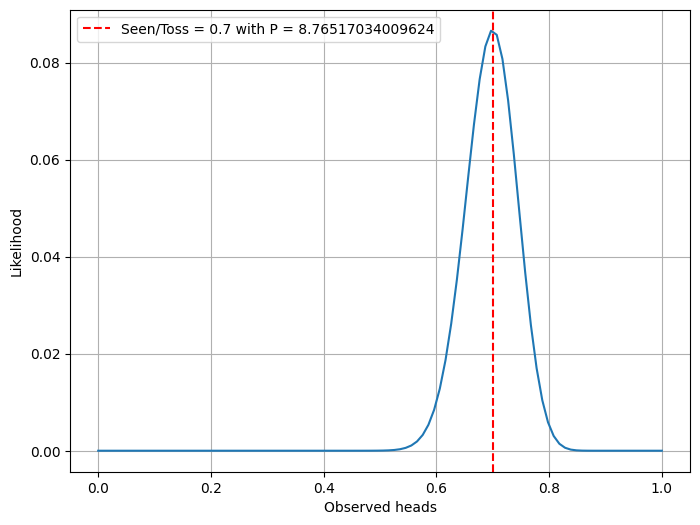

In [27]:

theta_r = np.linspace(0., 1, 100)


# Likelihood function for evidence calculation
def likelihood_integrand(theta, x, n):
    return math.comb(n, x) * theta**x * (1 - theta)**(n-x)


toss = 10  # Number of tosses
seen = 7   # Number of heads observed


# Compute the evidence (integral of likelihood)
evidence_value, _ = quad(lambda theta: likelihood_integrand(theta, seen, toss), 0, 1)

posterior = likelihood_integrand(seen/toss, seen, toss)/evidence_value

# Multiply by 120 as required by the binomial coefficient
print(f"Likelihood = {likelihood_integrand(seen/toss, seen, toss)}")
print(f"Evidence = {evidence_value}" )
print(f"Posterior = {posterior}")


plt.figure(figsize=(8, 6))

plt.plot(theta_r, likelihood_integrand(theta_r, seen, toss))
plt.axvline(seen/toss, color="red", linestyle="--", label=f"Seen/Toss = {seen/toss} with P = {posterior}")
plt.xlabel("Observed heads")
plt.ylabel("Likelihood")
#plt.title("Marginalized Posterior for Slope (a)")
plt.legend()
plt.grid(True)




### What if we use Gaussian priors for the posterior? 

In [28]:


# Gaussian prior
def gaussian_prior(theta, mu, sigma):
    return norm.pdf(theta, loc=mu, scale=sigma)

# Posterior function (Likelihood * Prior)
def posterior_integrand(theta, x, n, mu, sigma):
    return likelihood_integrand(theta, x, n) * gaussian_prior(theta, mu, sigma)

# Parameters
mu = 0.5  # Prior mean for theta (e.g., we initially think the coin is fair)
sigma = 0.1  # Prior standard deviation (e.g., we're fairly confident the coin is fair)

# Compute the evidence (normalizing constant)
evidence_value, _ = quad(lambda theta: posterior_integrand(theta, seen, toss, mu, sigma), 0, 1)

# Posterior distribution (normalized likelihood * prior)
def posterior_gauss(theta, x, n, mu, sigma, evidence):
    return posterior_integrand(theta, x, n, mu, sigma) / evidence

# Compute posterior at specific values of theta
theta_values = [0.1, 0.3, 0.5, 0.7, 0.9]
posterior_gauss_values = [posterior_gauss(theta, seen, toss, mu, sigma, evidence_value) for theta in theta_values]

# Output evidence and posterior values
print(f"Posterior with flat prior = {posterior}")
print(f"Evidence = {evidence_value}")
for theta, post in zip(theta_values, posterior_gauss_values):
    print(f"Posterior at theta = {theta}: {post}")


Posterior with flat prior = 8.76517034009624
Evidence = 0.0073077415614515315
Posterior at theta = 0.1: 2.280262566372715e-47
Posterior at theta = 0.3: 1.2243497497861486e-14
Posterior at theta = 0.5: 0.012649281670381133
Posterior at theta = 0.7: 6.411754844347143
Posterior at theta = 0.9: 3.3704294069290005e-09



<a name='from_pdf_to_posterior'></a>

## From PDF to Posterior

Once we have $L(\theta_\alpha)$ we need to search the maximum to obtain  the maximum likelihood estimators $\theta_i$. 
Because of the priors, this will differ in general from the maximum of $f(x_i;\theta_\alpha)$. 

$$
\frac{\partial f(x_i;\theta_\alpha)}{\partial \theta_\alpha} = 0 \quad {\rm replaced \ with } \quad \frac{\partial L(\theta_i)}{\partial \theta_i} = 0\,,\hspace{1cm} i = 1,\,...\,n\,.
$$
Usually the denominator $g(x_i)$ is discarded, hence the posterior $L$ is not normalized and its normalization has to be recalculated. 

The overall normalization $N$ is the integral over the parameter space:
$$
N = \int L(\theta_i){\rm d}^n\theta_i\,,
$$
where the integral extends to the whole parameter domain. From the normalized likelihood 
[i.e. $L(\theta_i)/N$ which we keep calling $L(\theta_i)$], we can derive the regions of confidence (or belief ) for the parameters. 


These are defined as regions $R(\alpha)$ of constant $L(\theta_i)$ for which
$$
\int_{R(\alpha)}L(\theta_i){\rm d}^n\theta = \alpha\,.
$$

The region $R(\alpha)$ is the region for which the integral above evaluates to $0 < \alpha < 1$ 
(remember that now $L$ is normalized and therefore its integral over the whole domain is 1). To find $R$ one evaluates

$$
\int_{R(\alpha)}\hat{L}(L_i){\rm d}^n\theta = \alpha_i\,,
$$

where $\hat{L}(L_i) = L$ if $L > L_i$ and 0 elsewhere (i.e. the volume lying within the curve of *height* $L_i$, 
smaller than the peak of L). 

By trial and error (or by interpolating over a grid of $L_i$) one finds the preferred $\alpha_i$. 

The typical choices are $\alpha = 0.683,\,0.954,\,0.997$ (also denoted as $1,\,2,\,3\sigma$, respectively). 

The value $L_i$ that corresponds to $\alpha_i$ is the level  at which we have to cut $L$ to find the region $R(\alpha_i)$.


**A code below**: 

Explanation:
- Data Generation: We simulate synthetic data from a true linear model 
$$ 
y =2.5\, x + 1.0 
$$ 
with Gaussian noise.
- Likelihood: The log-likelihood function assumes Gaussian errors with a known standard deviation of 
$$
\sigma = 1
$$

This defines how well the model fits the data for given values of $a$ and $b$

- Prior: We use uniform priors on both the slope and the intercept, meaning we consider all values of $a$ and $b$ within a certain range to be equally likely a priori.

- Full grid Sampling: We create a gird of $a$ and $b$ and we evaluate the likelihood

- Confidence Regions: We use seaborn's kdeplot function to visualize the confidence regions (1, 2, and 3$\sigma$) for the slope and intercept.


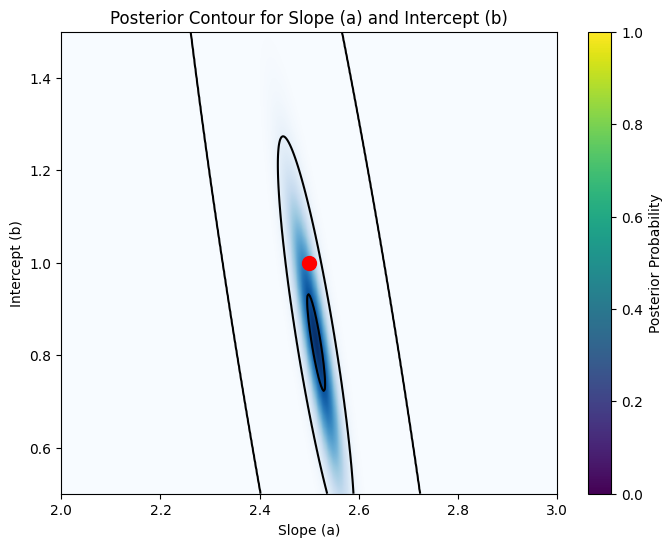

In [34]:

[n_data, sigma_data, sigma_like] = [100, 1, 1]

# Generate synthetic data
np.random.seed(42)
true_a = 2.5  # True slope
true_b = 1.0  # True intercept

x_data = np.linspace(0, 10, n_data)  # Generate x data
y_data = true_a * x_data + true_b + np.random.normal(0, sigma_data, len(x_data))  # Add noise

# Likelihood function
def log_likelihood(a, b, x, y):
    model = a * x + b
    sigma = sigma_like  # Assume known error
    return -0.5 * np.sum(((y - model) / sigma) ** 2)


# Prior function: uniform priors. So we don't care. 
def log_prior(a, b):
    if 0 < a < 10.0 and -10.0 < b < 10.0:  # Uniform priors in a range
        return 0.0
    return -np.inf  # log(0) = -infinity for values outside prior range

# Posterior function: log(posterior) = log(prior) + log(likelihood)
def log_posterior(a, b, x, y):
    lp = log_prior(a, b)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(a, b, x, y)

# Set up the grid for parameters a and b
a_vals = np.linspace(2.0, 3.0, 400)  # Range of slopes (a)
b_vals = np.linspace(0.5, 1.5, 400)  # Range of intercepts (b)
posterior_grid = np.zeros((len(a_vals), len(b_vals)))

# Calculate the posterior for each point in the grid
for i, a in enumerate(a_vals):
    for j, b in enumerate(b_vals):
        posterior_grid[i, j] = np.exp(log_posterior(a, b, x_data, y_data))

# Normalize the posterior
posterior_grid /= np.sum(posterior_grid)

# Create meshgrid for a and b values to use in contour plotting
A, B = np.meshgrid(a_vals, b_vals)

# Plot the 2D posterior with contours at 1, 2, and 3 sigmas
plt.figure(figsize=(8, 6))
contour_levels = [0.68, 0.95, 0.997]  # 1, 2, and 3 sigma levels
plt.contour(A, B, posterior_grid.T, levels=np.percentile(posterior_grid, [68, 95, 99.7]), colors='black', linewidths=1.5)
plt.imshow(posterior_grid.T, extent=[a_vals.min(), a_vals.max(), b_vals.min(), b_vals.max()], origin='lower', aspect='auto', cmap='Blues')
plt.scatter(true_a, true_b, color="red", label="True value", s=100)

plt.colorbar(label="Posterior Probability")
plt.xlabel("Slope (a)")
plt.ylabel("Intercept (b)")
plt.title("Posterior Contour for Slope (a) and Intercept (b)")
plt.show()


## Marginalization 


Often, we are interested in some subset of parameters and consider the others as *nuisance* to get rid of. 

For instance, if we are analyzing a set of supernovae apparent magnitudes $m_i$ and comparing them to the 
theoretical predictions $m_{th} = 5 \log_{10} d_L(z;\,\Omega_{m,0},\, \Omega_{L,0}) + C$, we may be interested in $\Omega_{m,0}$, 
$\Omega_{L,0}$ but not in the constant $C$.

How to get rid of $C$? By integrating it out:
$$
L(\Omega_{m,0}, \Omega_{L,0}) = \int L(C,\,\Omega_{m,0},\,\Omega_{L,0}){\rm d} C\,,
$$

where the integration extends over the domain of definition of $C$, which in absence of better information could 
as well be from $-\infty$ to $+\infty$: this procedure is called *marginalization*.

Often one wants to marginalize a multidimensional problem down to a more manageable and plottable 2-D likelihood. 

Also, one could quote final confidence regions by marginalizing in turn to single parameters, e.g.,

$$
L(\Omega_{L,0}) = \int L(\Omega_{m,0},\,\Omega_{m,0}){\rm d} \Omega_{m,0}\,.
$$

For instance, if the maximum likelihood estimator of $\Omega_{m,0}$ is $0.3$ and 

$$
\int_R L(\Omega_{m,0}){\rm d}\Omega_{m,0} = 0.683\,,
$$

where $R$ is the interval $\Omega_{m,0} = [0.1,\,0.4]$, and the final result $\Omega_{m,0} = 0.3^{+0.1}_{-0.2}$ at $68.3\%$ confidence level (or at 1$\sigma$. Notice that the this will absolutely not imply that the $2\sigma$ is the double!)



In the common case in which we want to marginalize over a constant offset or over a multiplicative factor one can
often obtain an analytical result. Here we work out the first case, leaving the second as an **Exercise**.

Let us suppose we have: 
- $N$ standard candle sources at redshifts $z_i$ 
- with apparent magnitudes $m_i$ and
- our preferred cosmological model predicts magnitudes  $m_{th,i} = M + 5\log d_L(z_i;\,\theta_j) + 25$.

$d_L(z_i;\,\theta_j)$ is the luminosity distance measured in Megaparsecs. The luminosity distance is proportional to $1/H_0$.

We can therefore take this factor out of the logarithm and write $m_{th,i} = \alpha + \mu_i$, 

where $\mu_i = 5\log_{10} \hat{d}_L(z_i;\theta_j)$ and $\alpha = M + 25 - 5\log_{10} H_0$ and $\hat{d}_L = d_L H_0$. 


We have very little information on $\alpha$, so we decide to marginalize it over: 
$$
L(\theta_j) = N\int {\rm d} \alpha \exp\left[-\frac12 \sum_i \frac{(m_i-\mu_i-\alpha)^2}{\sigma_i^2}\right]\,,
$$
where N is an unimportant normalization factor. Then we have

$$
L(\theta_j) = N\int {\rm d}\alpha \exp\left[-\sum_{i}\frac{1}{2}\frac{(m_i-\mu_i)^2+\alpha^2-2\alpha(m_i-\mu_i)}{\sigma_i}\right] =
$$

$$ = N \exp(-S_2/2)\int{\rm d} \alpha\exp\left(\alpha\,S_1-\alpha^2S_0/2\right) = $$

$$= N \exp\left[-\frac12 \left(S_2-\frac{S_1^2}{S_0}\right)\right]\int{\rm d} \alpha\exp\left[-\frac12 \left(\alpha-\frac{S_1}{S_0}\right)^2S_0\right]\,,
$$

where
$$
S_0 = \sum\frac{1}{\sigma_i^2}\,,\quad S_1 = \sum\frac{y_i}{\sigma_i^2}\,, \quad S_2 =\sum\frac{y^2_i}{\sigma_i^2}
$$
being $y_i = m_i-\mu_i$. The integration in the region $(-\infty,\,+\infty)$ gives a constant independent of $\mu_i$ and therefore independent of the theoretical parameters that we absorb in $N$: 

$$
L(\theta_j) = N\exp\left[-\frac12 \left(S_2-\frac{S_1^2}{S_0}\right)\right]\,.
$$

This is then the new likelihood marginalized over the nuisance additive parameter $\alpha$. 

Notice that the parameters $\theta_j$ ended up inside $\mu_i$ which are inside $S_1$, $S_2$. 

A similar analytic integration can get rid of multiplicative parameters. If the analytical integration is impossible, 
then one has to marginalize numerically. 



1-sigma (68%) confidence interval for a: [2.479, 2.544]
2-sigma (95%) confidence interval for a: [2.446, 2.569]


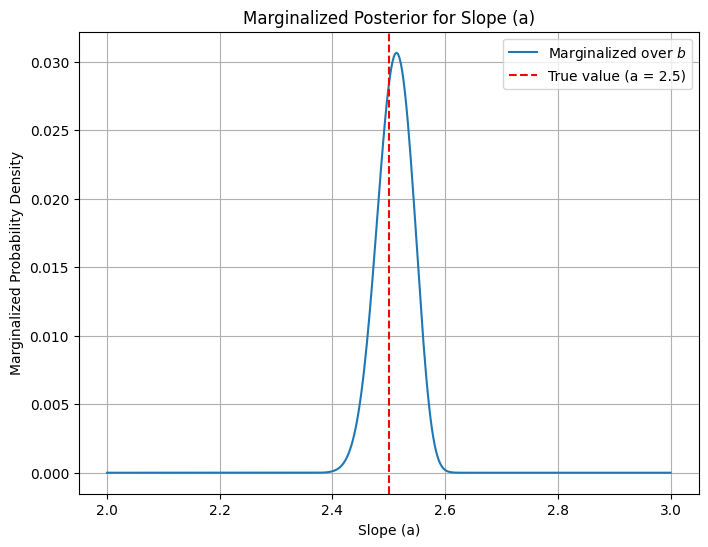

In [35]:
# Marginalize over b (sum over b-axis)
marginal_a = np.sum(posterior_grid, axis=1)

# Plot the marginalized PDF for a
plt.figure(figsize=(8, 6))
plt.plot(a_vals, marginal_a, label="Marginalized over $b$")
plt.axvline(true_a, color="red", linestyle="--", label=f"True value (a = {true_a})")
plt.xlabel("Slope (a)")
plt.ylabel("Marginalized Probability Density")
plt.title("Marginalized Posterior for Slope (a)")
plt.legend()
plt.grid(True)

# Compute 1-sigma (68%), 2-sigma (95%), and 3-sigma (99.7%) confidence intervals for a
cumulative_prob = np.cumsum(marginal_a)
cumulative_prob /= cumulative_prob[-1]  # Normalize cumulative probability

a_16 = a_vals[np.searchsorted(cumulative_prob, 0.16)]
a_50 = a_vals[np.searchsorted(cumulative_prob, 0.50)]
a_84 = a_vals[np.searchsorted(cumulative_prob, 0.84)]
a_2sigma_lower = a_vals[np.searchsorted(cumulative_prob, 0.025)]
a_2sigma_upper = a_vals[np.searchsorted(cumulative_prob, 0.975)]

print(f"1-sigma (68%) confidence interval for a: [{a_16:.3f}, {a_84:.3f}]")
print(f"2-sigma (95%) confidence interval for a: [{a_2sigma_lower:.3f}, {a_2sigma_upper:.3f}]")

plt.show()


## Maximization



We can fix a parameter, for instance $\Omega_{L,0} = 0$ and evaluate $L(\Omega_{m,0}, \Omega_{L,0} = 0)$. 
Then the result will obviously depend on the fixed value. 

When that value is the maximum likelihood estimator, the likelihood is said to be *maximized* (as opposed to *marginalized*) with respect to that parameter.



For b = 0.6:
1-sigma (68%) confidence interval for a: [2.531, 2.564]
2-sigma (95%) confidence interval for a: [2.514, 2.581]
3-sigma (99.7%) confidence interval for a: [2.496, 2.599]

For b = 1.0:
1-sigma (68%) confidence interval for a: [2.471, 2.506]
2-sigma (95%) confidence interval for a: [2.454, 2.521]
3-sigma (99.7%) confidence interval for a: [2.436, 2.539]

For b = 1.4:
1-sigma (68%) confidence interval for a: [2.411, 2.446]
2-sigma (95%) confidence interval for a: [2.393, 2.461]
3-sigma (99.7%) confidence interval for a: [2.376, 2.481]


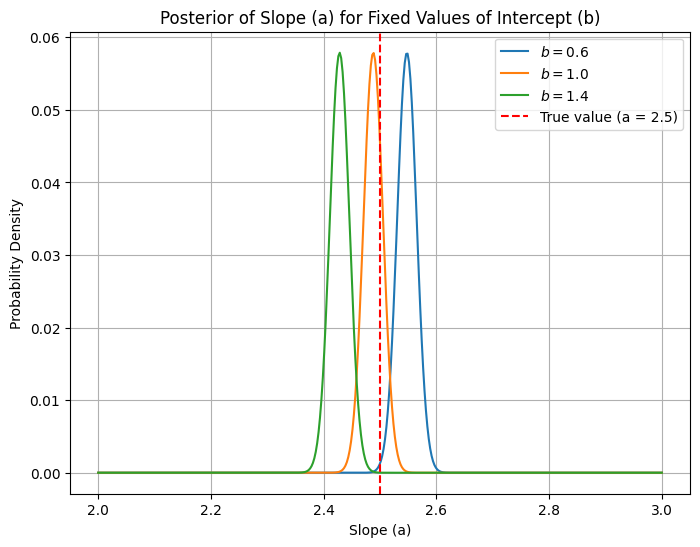

In [36]:
# Fix b to different values and plot the 1D PDF for a
b_fixed_vals = [0.6, 1.0, 1.4]  # Different values of b

plt.figure(figsize=(8, 6))
for b_fixed in b_fixed_vals:
    posterior_a_fixed_b = np.zeros(len(a_vals))
    
    # Evaluate the posterior for each a, fixing b
    for i, a in enumerate(a_vals):
        posterior_a_fixed_b[i] = np.exp(log_posterior(a, b_fixed, x_data, y_data))
    
    # Normalize the posterior
    posterior_a_fixed_b /= np.sum(posterior_a_fixed_b)
    
    # Plot the posterior for fixed b
    plt.plot(a_vals, posterior_a_fixed_b, label=f"$b = {b_fixed}$")
    
    # Calculate the cumulative distribution function (CDF)
    cumulative_prob = np.cumsum(posterior_a_fixed_b)
    cumulative_prob /= cumulative_prob[-1]  # Normalize CDF
    
    # Compute 1-sigma (68%), 2-sigma (95%), and 3-sigma (99.7%) confidence intervals
    a_16 = a_vals[np.searchsorted(cumulative_prob, 0.16)]
    a_50 = a_vals[np.searchsorted(cumulative_prob, 0.50)]
    a_84 = a_vals[np.searchsorted(cumulative_prob, 0.84)]
    a_2sigma_lower = a_vals[np.searchsorted(cumulative_prob, 0.025)]
    a_2sigma_upper = a_vals[np.searchsorted(cumulative_prob, 0.975)]
    a_3sigma_lower = a_vals[np.searchsorted(cumulative_prob, 0.00135)]
    a_3sigma_upper = a_vals[np.searchsorted(cumulative_prob, 0.99865)]
    
    # Print the confidence intervals for a
    print(f"\nFor b = {b_fixed}:")
    print(f"1-sigma (68%) confidence interval for a: [{a_16:.3f}, {a_84:.3f}]")
    print(f"2-sigma (95%) confidence interval for a: [{a_2sigma_lower:.3f}, {a_2sigma_upper:.3f}]")
    print(f"3-sigma (99.7%) confidence interval for a: [{a_3sigma_lower:.3f}, {a_3sigma_upper:.3f}]")

plt.axvline(true_a, color="red", linestyle="--", label=f"True value (a = {true_a})")
plt.xlabel("Slope (a)")
plt.ylabel("Probability Density")
plt.title("Posterior of Slope (a) for Fixed Values of Intercept (b)")
plt.legend()
plt.grid(True)
plt.show()


## Exercise

**Prove that**: if the Gaussian likelihood $f(x_i; \mu, \sigma^2)$ is 

$$
f(x_i; \mu, \sigma^2) = (2\pi\sigma^2)^{-n/2}\exp\left[-\frac{1}{2}\sum_i^{n}\frac{(x_i-\mu)}{\sigma^2}\right]\,,
$$
then the maximum likelihood estimator of $\mu$ is given by 
$$
\hat{\mu} = \frac{1}{n}\sum_i^{n}x_i\,.
$$
and that maximum likelihood variance estimator is
$$
\hat{\sigma} = \frac{1}{n}\sum_i^{n}(x_i-\hat{\mu})^2\,.
$$

**Notice** the difference from the standard results? 

The estimate of the sample variance  has $(n - 1)$ instead of $n$ at the denominator!!! 

In this case in fact the maximum likelihood estimator is said to be a biased estimator because it underestimates the true population variance, especially for small sample sizes. 

This bias occurs because the calculation uses the sample mean $\hat{\mu}$ rather than the true population mean $\mu$
When we estimate the variance using $\hat{\mu}$ we are already fitting the data, and this fitting process reduces the variability. As a result, the estimator systematically underestimates the true variance.

Demonstration. Evaluate the exepcted value of $\hat{\sigma}$
$$
E[\hat{\sigma}^2] = \frac{n-1}{n}\sigma^2 \implies E[\hat{\sigma}^2]< E[\sigma^2]
$$

Indeed, maximum likelihood estimators are not necessarily unbiased although under some general conditions  they are asymptotically (i.e. for $n \rightarrow \infty$) unbiased.

Notice that if we follow the frequentist approach (and therefore do not use Bayes' theorem) we could still derive a 
PDF for the variance (here we need to distinguish between the particular ML value of the estimator, $\sigma_\text{ML}^2$, 
and its generic value as random variable, which we denote it with $\hat{\sigma}^2$). 

Since $\hat{\sigma}^2$ is a quadratic function of Gaussian variables, it follows a $\chi^2$ distribution with $n$ 
degrees of freedom (we assume here that $\mu$ is known in advance, i.e. is not estimated from the data)

$$
P(z=\hat{\sigma}^2(n/\sigma_\text{ML}^2)) = \frac{1}{2^{n/2}\Gamma(n/2)}z^{n/2-1}e^{-z/2}\,.
$$

However using the Bayesian approach, (with uniform prior, so that the maximum likelihood estimator is the 
same for frequentists and Bayesians) we would obtain that $\hat{\sigma}^2$ is distributed as
$$
P(\hat{\sigma}^2) = \frac{1}{(2\pi\hat{\sigma})^{n/2}}\exp\left[-\frac12 \sum_{i}^{n}\frac{(x_i-\mu)^2}{\hat{\sigma}^2}\right]\,.
$$

By construction, the Bayesian PDFs has the peak (or mode) at the ML estimator, while, again by construction, 
the frequentist distribution has the mean at the ML estimator (since $\langle \hat{\sigma}^2\rangle = \sigma^2$ for fixed $\mu$) 
and the mode at $(n - 2)\sigma_{ML}^2/n$. 

The two distributions are clearly different. 
It is only in the $n \rightarrow \infty$ limit that they become identical Gaussian distributions. 

On the other hand, the frequentist and Bayesian distributions for the mean parameter $\hat{\mu}$ of Gaussian variables are identical.


## Conclusion 



Is the use of priors constitutes the whole difference between the Bayesian approach and the frequentist one? 

**The frequentist approach**:
- prefers not to deal with priors at all 
- refuses to use Bayes' theorem to convert theoretical parameters into random variables. 
- when a maximum likelihood estimator is found (which as any other estimator is a function of data and therefore is a random variable), its distribution as a function of the assumed distribution of the data is determined.
- the previous usually done by generating numerically many mock datasets and calculating for each dataset the estimator, deriving then its approximate distribution.

This Monte Carlo approach is the hallmark of the frequentist approach. It is powerful, objective and general but by rejecting priors fails to take into account previous knowledge. It is therefore suitable only when one can afford not to fully consider previous knowledge. 

This applies for instance when new experiments are much better than previous ones so that priors do not really matter and when each experiment measures only one parameter, say the mass of a particle, so that the outcome does not depend on other poorly measured parameters. 

Both features characterize most particle physics experiments and this explains why most particle physicists are frequentist. 

Astrophysics and cosmology live in another experimental world: 
- data are hard to come by,
- observations cannot be twisted and repeated as easily as in a laboratory,
- models are characterized by many correlated parameters
- every drop of previous information, even loosely related to a given parameter, has to be taken into account.

Most of the evidence for dark energy comes from combining CMB and supernovae priors, each of them measuring many correlated parameters at once. It is no surprise that Bayesian methods are so popular in astrophysics and cosmology.



<a name='model_selection'></a>

# Model selection

So far we have been working within a given model. When we choose a model to test, we also select some free functions 
that define the model and that we parametrize in some convenient way. 

If we decide to change a model, we have to start a new process so that the likelihood will give us a new set of best fit parameters. 

But how do we decide whether **Model A** is better than **Model B**?

This is a problem of *model selection*, rather than model optimization. 

One possibility (the frequentist approach) is to simply evaluate the "goodness of fit": 
once we have the best fit parameters for models $A$ and $B$, we calculate the $\chi^2$ statistics of the model 
prediction with respect to data and choose the one with better $\chi^2$ statistics which is not necessarily the one with lowest $\chi^2$ 
because the $\chi^2$ statistics depends also on the number of degrees of freedom, 
namely on the number of independent data minus the number of free parameters, i.e. 
$$
\chi_{\rm min}^2/(N_{\rm data} - n_p)
$$

Beside the intrinsic problem of any frequentist approach (e.g., lack of priors), this is often too rough a guide to selection, 
mostly because if the model $B$ includes a parameter that is poorly constrained by the data it would not help in the fit 
but it would still be counted as an extra degree of freedom and this would unfairly penalize it. 


To overcome this problem we can instead use another model selection procedure, called *evidence* or marginal likelihood. 

Let us consider again Bayes theorem for the parameters ($\theta$) and data ($D$), and let us add now the specification 
that the probabilities are taken given a model $M$
$$
P(\theta;\,D,\,M) = \frac{L(D;\,\theta,\,M)p(\theta;\,M)}{E(D;\,M)}\,.
$$
This form can be obtained by combining the probabilities of obtaining the data and the parameters given a model 
$$
P(D,\,\theta;\,M) = P(D;\,\theta,\,M)P(\theta;\,M)
$$
$$
P(\theta,\,D;\,M) = P(\theta;\,D,\,M)P(D;\,M)
$$
and equaling the two since "data and parameters" equals "parameters and data".


By integration of $P(\theta;\,D,\,M)$ over the parameters we obtain the normalization unity on the rhs, 
from which the *evidence*
$$
E({\bf x};\,M) = \int f({\bf x};\,\theta_i^{M})p(\theta_i^M){\rm d}^n\theta_i^M
$$
where: 
- ${\bf x} = (x_1,\,x_2,\,...)$ are random data;
- $\theta_i^M$ are $n$ theoretical parameters that describe the model $M$;
- $f$ is the likelihood function;
- $p$ is the prior probability of the parameter $\theta_i^M$. 

Note that we have added a superscript $M$ to remember that the parameters refer to some model $M$. 

One can see that the evidence is then the likelihood averaged over the entire parameter space.


Now if we have any reason to weigh the models in some way, we can assign a model prior $p(M_j)$ and use 
Bayes' theorem again to write
$$
L(M;\,{\bf x}) = E({\bf x};\,M)\frac{p(M)}{p({\bf x})}
$$
i.e. the probability of having model $M$ given the data. 

We can finally use this probability to compare quantitatively two models taking the ratio of probabilities (so that $p(x)$ cancels out):
$$
\frac{L(M_1;\,{\bf x})}{L(M_2;\,{\bf x})} = B_{12}\frac{p(M_1)}{p(M_2)}
$$
where we introduced the Bayes ratio
$$
B_{12} = \frac{\int f({\bf x};\,\theta_i^{M_1})p(\theta_i^{M_1}){\rm d}^n\theta_i^{M_1}}{\int f({\bf x};\,\theta_i^{M_2})p(\theta_i^{M_2}){\rm d}^n\theta_i^{M_2}}
$$
Often, however, one assumes that $p(M_1) = p(M_2)$. 

A Bayes ratio 
\begin{equation}
B_{12}
\begin{cases} 
> 1 \quad {\rm data \,\, favors \,\, M_1}\\
< 1 \quad {\rm data \,\, favors \,\, M_2}
\end{cases}
\end{equation}



The evidence is often not easy to evaluate because it requires a multidimensional integration over the whole parameter space. 

Several approximation or alternative model selection techniques have been proposed 
(see for instance the excellent review by Trotta \cite{trotta-review}). 
They are however only justified in specific cases and may give conflicting results, sometimes leading to controversies. 

Whenever possible, the evidence integral should be used instead.

Let us now come back to the Bayes factors, i.e. the ratio of the evidences. 

Once we have calculated this ratio we have still to decide how to gauge it in favor of the model $A$ or $B$. 
There is no absolute way to achieve this: 
- large or small factors should incline us towards one of the two models over the other one, but there is no absolute "statistics" to associate to any specific level. 
- The scale most used in literature is called Jeffreys' scale.
  - If $|\ln B_{12}| < 1$ there is no evidence in favor of any of the models ("inconclusive evidence");
  - if $|\ln B_{12}| > 1$ there is a "weak evidence";
  - if $|\ln B_{12}| > 2.5$ means "moderate evidence";
  - if $|\ln B_{12}| > 5$ means "strong evidence". 
Of course this terminology is purely suggestive and not to be taken literally.

We can consider it as a practical bookkeeping device. When the data promote a model from weakly to moderately to strongly "evident", it is time to take it seriously and challenge aggressively.




Suppose now that a certain parameter $\theta_n$ is very poorly constrained by the data $x_i$. 

This implies that the likelihood $f(x_i;\,\theta_i)$ is practically independent of $\theta_n$, i.e., 
$f = {\rm constant}$ in $\theta_n$. 


Then if the prior is factorizable (which is often the case) so that 
$$
p(\theta_i) = \prod_i p_i(\theta_i)\,,
$$ 
we see that the integral over $\theta_n$ decouples. 

Since the priors are just standard probability distribution functions we have 
$$
\int p_n(\theta_n){\rm d} \theta_n = 1\,,
$$ 
so that as expected $\theta_n$ does not enter the evidence integral. 

The evidence therefore correctly discards poorly constrained parameters and does not penalize models for introducing them.

The blame is where it belongs: poor data.


**Special case**

If the likelihood and the prior can both be approximated by Gaussian distributions in the parameters, 
we can evaluate the evidence analytically. 

Let us assume: 
- an uncorrelated Gaussian likelihood with best fit parameters $\theta(B)$ and variances $\sigma^{(B)}_i$;
- an uncorrelated Gaussian prior with means $\theta(P)$ and variances $\sigma_{P,i}$. 

The posterior can be written as

\begin{eqnarray}
L(\theta_i)&=&\prod_if({\bf x};\theta_i)p(\theta_i) = \\
&=& L_\text{max}\prod_i \frac{1}{\sqrt{2\pi\sigma_{P,i}^2}}\exp\left[-\frac{\left(\theta_i-\theta_i^{(B)}\right)^2}{2\sigma_{B,i}^2}-\frac{\left(\theta_i-\theta_i^{(P)}\right)^2}{2\sigma_{P,i}^2}\right]  =\\
&=& L_\text{max}\prod_i \frac{1}{\sqrt{2\pi\sigma_{P,i}^2}}\exp\left[-\frac{\left(\theta_i-\theta_i^{*}\right)^2}{2\sigma_{i*}^2}\right]\exp\left[-\frac{\left(\theta_i^{(B)}-\theta_i^{(P)}\right)^2}{2\left(\sigma_{B,i}^2+\sigma_{P,i}^2\right)}\right] \,,
\end{eqnarray}

where $L_\text{max}$ is the likelihood maximum and where the posterior mean and variance for each $i$ are:
\begin{eqnarray}
\theta_i^{*} &=& \frac{\sigma_{B,i}^2\theta_i^{(P)}+\sigma_{P,i}^2\theta_i^{(B)}}{\sigma_{B,i}^2+\sigma_{P,i}^2}\,,\\
\sigma_{i*}^2 &=&\frac{\sigma_{P,i}^2\sigma_{B,i}^2}{\sigma_{P,i}^2+\sigma_{B,i}^2}\,.
\end{eqnarray}

The evidence is therefore 

\begin{eqnarray}
E &=& \int\prod_i f({\bf x};\theta_i)p(\theta_i){\rm d} \theta_i = \\
&=& L_\text{max}\prod_i\frac{\sigma_{i*}}{\sigma_{P,i}}\exp\Bigg\{-\frac12 \left[\left(\frac{\theta_i^{(B)}}{\sigma_{B,i}}\right)^2+
\left(\frac{\theta_i^{(P)}}{\sigma_{P,i}}\right)^2-\left(\frac{\theta_i^{*}}{\sigma_{i*}}\right)^2\right]\Bigg\}\,.
\end{eqnarray}

If the data $x_i$ are Gaussian with mean $\hat{x}_i$ and the correlation matrix $C_{ij}$ the 
$$
L_\text{max} = e^{-\frac{\chi_\text{min}^2}{2}}
$$
where $\chi_\text{min}^2$ is the minimum of $(x_i-\hat{x}_i)C_{ij}^{-1}(x_j-\hat{x}_j)$, i.e. the usual $\chi^2$ minimum. 


The evidence is determined by three factors:  
- $L_\text{max}$, is the likelihood maximum: expresses how well the model fits the data. 
In forming the Bayes ratio one would get the likelihood ratio, 
which is the basis of the frequentist approach to model selection (i.e. for Gaussian distributed variables $-2 \log L_\text{max} = \chi^2$).

- The ratio of parameter volumes: if we take the variance as a measure of the available parameter space 
for the $i-$th parameter, this factor expresses how the parameter volume changes from the prior to the posterior. Every factor $$\frac{\sigma_{i*}}{\sigma_{P,i}} = \frac{\sigma_{B,i}}{(\sigma_{B,i} +\sigma_{P,i})^{1/2}}$$ is smaller than unity,
so adding more parameters penalizes the evidence, quantifying Occam's razor argument. 
If however the data do not constrain the $i-$th parameter, i.e. if $\sigma_{B,i} \gg \sigma_{P,i}$, then the $i-$th factor 
$\sigma_{i*}/\sigma_{P,i}$ is close to unity and there is no penalization. 

- The third factor penalizes the evidence if the best-fit $i-$th parameter or the prior mean differ appreciably 
from the posterior mean $\theta_{i*}$: although the new data might justify that parameter, 
the overall agreement including the prior does not seem to require it. 
The model is then penalized because of its inconsistency with the prior. 
Here again, if data constraints are very weak (large $\sigma_{B,i}$) then there is no penalization.


It is a matter of straightforward algebra to extend the expression to correlated Gaussian parameters. If the evidence integral is
\begin{eqnarray}
E &=& \int f({\bf x};\theta_i)p(\theta_i){\rm d} \theta_i = \\
&=& L_\text{max} \int \exp\left[-\frac12 \left(\theta_i-\theta_i^{(B)}\right)L_{ij}\left(\theta_j-\theta_j^{(B)}\right)
-\frac12 \left(\theta_i-\theta_i^{(P)}\right)P_{ij}\left(\theta_j-\theta_j^{(P)}\right)\right]{\rm d} \theta_i\,,
\end{eqnarray}
where $\theta_i^{(B)}$ are the best fit estimators $\theta_i^{(P)}$ are the prior means, $L_{ij}$ in the exponential factor is the inverse of the covariance matrix of the likelihood (or Fisher matrix, see next section) and $P_{ij}$ is the inverse of the covariance matrix of the prior, we obtain 
$$
E = L_\text{max}\frac{|{\bf P}|^{1/2}}{|{\bf F}|^{1/2}}\exp\left[-\frac12\left(\theta_i^{(B)}L_{ij}\theta_j^{(B)}+
\theta_i^{(P)}P_{ij}\theta_j^{(P)}\right)- \tilde{\theta}_i F_{ij}\tilde{\theta}_j\right]
$$
where ${\bf F= P+L}$ and $\tilde{\theta}_i = ({\bf F}^{-1})_{im}\left[L_{mj}\theta_j^{(B)}+P_{mj}\theta_j^{(P)}\right]$. 
If the prior is very weak the exponential term reduces to unity for Gaussian data we can write the Bayes ratio as
$$
B_{AB} = e^{-\frac12(\chi^2_A-\chi^2_B)}\frac{| P_AF_B|^{1/2}}{|  F_AP_B|^{1/2}}\,.
$$

**Exercise: simple case**.

Evaluate the Bayes ratio for two models: 
- model $A$ predicting that a quantity $\theta = 0$ with no free parameters
- model $B$, $\theta$ has a Gaussian prior distribution with zero mean and variance $\Sigma^2$. 
We assume that we performed a measurement of $\theta$ described by a normal likelihood of standard deviation $\sigma$, 
and with the maximum likelihood value lying $\lambda$ standard deviations away from 0, i.e. $$|\theta_\text{max}/\sigma | = \lambda$$.
- The prior of model $A$ is a Dirac $\delta_D$ function centered on $\theta = 0$, 
- The prior of model $B$ is $e^{-\theta^2/2\Sigma^2}/\sqrt{2\pi \Sigma^2}$. 
- The data are described by a Gaussian $e^{-(\theta-\theta_\text{max})^2/2\sigma^2}$ with $\theta_\text{max} = \lambda\sigma$.

We calculate Bayes' ratio as
\begin{eqnarray}
B_{AB} &=&  \frac{\int f({\bf x};\theta_i^{M_1})p(\theta_i^{M_1}){\rm d}\theta_i^{M_1}}{\int f({\bf x};\theta_i^{M_2})p(\theta_i^{M_2}){\rm d}\theta_i^{M_2}} = \\
&=& \frac{\int e^{-(\theta-\theta_\text{max})^2/2\sigma^2}\delta(\theta){\rm d} \theta}{(2\pi\Sigma^2)^{1/2}\int e^{-(\theta-\theta_\text{max})^2/2\sigma^2}e^{-\theta^2/2\Sigma^2}{\rm d} \theta} = \\
&=& \sqrt{1+r^{-2}} e^{-\frac{\lambda^2}{2(1+r^2)}}\,,
\end{eqnarray}
where $r = \sigma/\Sigma$. 

- If the best-fit parameter $\theta_\text{max}$ is many $\sigma$ away from the predicted 
$\theta = 0$ (i.e. $\lambda \gg 1$), then it follows that $B_{AB} \ll 1$, favoring model $B$ that allows for 
the extra freedom $\Sigma$.

- But if $\lambda$ is not too large and $r \ll 1$, i.e. the data is much more peaked than 
the $B$ prior and close to the predicted value, then we have $B_{AB} \approx 1/r\gg 1$ so that the extra parameter 
introduced by model $B$ is not needed and $A$ is favored. This is in touch with Occam's razor argument.

- If $r \gg 1$, then $B_{AB}\approx 1$ and hence there is not enough information to decide between $A$ and $B$. 
Although $B$ has more parameters, the fact that the data have a large error and are too poor to constrain $\theta$ 
implies that no preference must be given to either $A$ or $B$.


<a name='mcmc'></a>

# MCMC 

As straightforward and versatile as the likelihood method is, it is still often too complicated or computing-expensive to implement, 
especially when there are more than a few parameters involved. 
In fact there are some cases in which several tens or hundreds of parameters are present.

One could think that a model with more than 3 or 4 free parameters does not deserve the name of model and even less 
that one of "theory". However every theory begins by representing a vast dataset with a smaller set of numbers. 
And since cosmological experiments may easily collect terabytes of data, reducing them to 10, 100, or 1000 numbers 
should be seen already as a great progress towards a unified description (if there is one!).

Anyway, the problem with the likelihood is that we need to evaluate $L(\theta_i)$ for every $\theta_i$, 
or at least for many $\theta_i$, e.g., for a grid of, say, ten values for each dimension in parameters space. 
If there are 10 parameters, this means $10^{10}$ different evaluations. 
If each evaluation takes a second (say, a run of a CMB code), we are in for a waiting time of a 300 years...

One way out is to use a Monte Carlo approach. Instead of building a full grid, one explores the landscape with random jumps. 
The size of the jumps in turn may be related to the steepness of the function (smaller jumps over rough terrain, larger ones over flatlands). This technique will grow with the number $D$ of dimensions (parameters) as $D$, 
instead of exponentially as in full grid method. But this might still be a lot: a typical Markov chain exploration can 
take hundred of thousands of computations. 

However, for the time being, it's the best we can do... so we do it. 


**Markov Chain Monte Carlo (MCMC)** is a class of algorithms used to sample from a probability distribution when direct sampling is difficult. MCMC is widely used in fields like Bayesian statistics, physics, computational biology, and machine learning for estimating complex posterior distributions.

Key Concepts in MCMC:
- Markov Chain: A Markov chain is a sequence of random variables where the probability of moving to the next state depends only on the current state and not on previous states. This "memoryless" property makes it computationally efficient to generate samples in MCMC.

- Monte Carlo Simulation: Monte Carlo methods refer to algorithms that rely on repeated random sampling to compute numerical results. In MCMC, this involves generating a large number of random samples from the target distribution to approximate it.

- Target Distribution: The goal of MCMC is to sample from a complex target distribution, often a posterior distribution in Bayesian inference, where direct sampling is challenging due to its high dimensionality or irregular shape.


![Loading GIF](images/metrop.gif)


**Main challenge** is to find the best method to span properly the parameters' space. 

Several methods: 
- Metropolis-Hastings: Proposes a new sample based on the current state and accepts or rejects it based on a probability ratio.

- Gibbs Sampling: Updates one variable at a time by sampling from the conditional distribution of that variable given the others.

- Hamiltonian: improves the efficiency of MCMC by leveraging gradient information from the target distribution.


**The Metropolis–Hastings** algorithm can draw samples from any probability distribution $P(x)$, provided that we know a function $f(x)$ proportional to the density of $P$ and the values of $f(x)$ can be calculated. The requirement that $f(x)$ must only be proportional to the density, rather than exactly equal to it, makes the Metropolis–Hastings algorithm particularly useful, because calculating the necessary normalization factor is often extremely difficult in practice.

The purpose of the Metropolis–Hastings algorithm is to generate a collection of states according to a desired distribution $P(x)$. To accomplish this, the algorithm uses a Markov process, which asymptotically reaches a unique stationary distribution $\pi (x)$ such that $\pi (x)=P(x)$.

A Markov process is uniquely defined by its transition probabilities $P(x'\mid x)$, the probability of transitioning from any given state $x$ to any other given state $x'$. It has a unique stationary distribution $\pi (x)$ when the following two conditions are met

- Existence of stationary distribution: there must exist a stationary distribution $\pi (x)$. A sufficient but not necessary condition is detailed balance, which requires that each transition $x\to x'$ is reversible: for every pair of states $x,x'$, the probability of being in state $x$ and transitioning to state $x'$ must be equal to the probability of being in state $x'$ and transitioning to state $x$, $\pi (x)P(x'\mid x)=\pi (x')P(x\mid x')$.

- Uniqueness of stationary distribution: the stationary distribution $\pi (x)$ must be unique. This is guaranteed by ergodicity of the Markov process, which requires that every state must (1) be aperiodic—the system does not return to the same state at fixed intervals; and (2) be positive recurrent—the expected number of steps for returning to the same state is finite.

The Metropolis–Hastings algorithm involves designing a Markov process (by constructing transition probabilities) that fulfills the two above conditions, such that its stationary distribution $\pi (x)$ is chosen to be $P(x)$. 

The derivation of the algorithm starts with the condition of detailed balance:
\begin{equation}
P(x'\mid x)P(x)=P(x\mid x')P(x')
\end{equation}
which is re-written as

\begin{equation}
\frac {P(x'\mid x)}{P(x\mid x')}=\frac {P(x')}{P(x)}\,.
\end{equation}

This equation essentially states that, for any two states $x - x'$, the probability flux from $x\rightarrow x'$ is balanced by the probability flux from $x' \rightarrow x$. This is key to ensuring that the Markov chain samples from the correct stationary distribution.

The approach is to separate the transition in two sub-steps; the proposal and the acceptance-rejection. The proposal distribution $g(x'\mid x)$ is the conditional probability of proposing a state $x'$ given $x$, and the acceptance ratio $A(x',x)$ is the probability to accept the proposed state $x'$. The transition probability can be written as the product of them:
\begin{equation}
P(x'\mid x)=g(x'\mid x)A(x',x)\,.
\end{equation}
Inserting this relation in the previous equation, we have
\begin{equation}
\frac {A(x',x)}{A(x,x')}=\frac {P(x')}{P(x)}\frac {g(x\mid x')}{g(x'\mid x)}
\end{equation}
The next step in the derivation is to choose an acceptance ratio that fulfills the condition above. One common choice is the Metropolis choice:
\begin{equation}
A(x',x)=\min \left(1,\frac {P(x')}{P(x)}\frac {g(x\mid x')}{g(x'\mid x)}\right)\,.
\end{equation}
For this Metropolis acceptance ratio $A$, either $A(x',x)=1$ or $A(x,x')=1$ and, either way, the condition is satisfied.

The Metropolis–Hastings algorithm thus consists in the following:

- Initialise
    - Pick an initial state $x_{0}$.
      
    - Set $t=0$.

- Iterate
    - Generate a random candidate state $x'$ according to $g(x'\mid x_{t})$.
      
    - Calculate the acceptance probability $A(x',x_{t})=\min \left(1,\frac {P(x')}{P(x_{t})}\frac {g(x_{t}\mid x')}{g(x'\mid x_{t})}\right)$.
      
    - Accept or reject: generate a uniform random number $u\in [0,1]$;
      
    - if $u\leq A(x',x_{t})$, then accept the new state and set $x_{t+1}=x'$;
      
    - if $u>A(x',x_{t})$, then reject the new state, and copy the old state forward $x_{t+1}=x_{t}$
      
    - Increment: set $t=t+1$
    

/var/folders/xl/x4g5dhs92l5g21nwpz7qdz4w0000gn/T/ipykernel_36175/2364277563.py:32: RuntimeWarning: overflow encountered in exp
  alpha = np.exp(proposal_log_likelihood - current_log_likelihood)


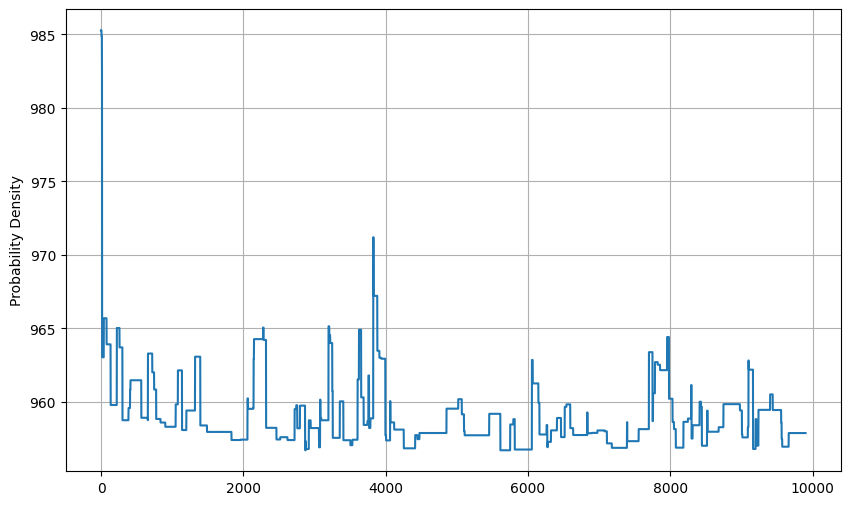

Median Chi-squared value: 958.15


In [17]:
#import numpy as np
#import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
np.random.seed(42)
true_a = 2.5  # True slope
true_b = 1.0  # True intercept
x_data = np.linspace(0, 10, 1000)  # Generate x data
sigma_noise = 0.5  # Standard deviation of noise

y_data = true_a * x_data + true_b + np.random.normal(0, sigma_noise, len(x_data))  # Add noise

# Step 2: Define the log-likelihood function
def log_likelihood(theta, x, y, sigma):
    a, b = theta
    model = a * x + b
    return -0.5 * np.sum(((y - model) / sigma) ** 2)

# Step 3: Define the Metropolis-Hastings algorithm
def metropolis_hastings(log_likelihood, initial_params, x, y, sigma, n_steps, proposal_width):
    n_dim = len(initial_params)
    chain = np.zeros((n_steps, n_dim))
    chain[0] = initial_params
    current_log_likelihood = log_likelihood(chain[0], x, y, sigma)

    for i in range(1, n_steps):
        # Propose new parameters
        proposal = chain[i - 1] + np.random.normal(0, proposal_width, n_dim)
        proposal_log_likelihood = log_likelihood(proposal, x, y, sigma)
        
        # Acceptance probability
        alpha = np.exp(proposal_log_likelihood - current_log_likelihood)
        
        # Accept or reject
        if np.random.rand() < alpha:
            chain[i] = proposal
            current_log_likelihood = proposal_log_likelihood
        else:
            chain[i] = chain[i - 1]
    
    return chain

# Step 4: Run the MCMC sampler
initial_params = [1.0, 1.0]  # Initial guess for slope and intercept
n_steps = 10000
proposal_width = 0.1
chain = metropolis_hastings(log_likelihood, initial_params, x_data, y_data, sigma_noise, n_steps, proposal_width)

# Discard the burn-in period and thin the chain
burn_in = 100
samples = chain[burn_in:]

# Step 5: Calculate chi-squared for the MCMC samples
def chi_squared(a, b, x, y, sigma):
    model = a * x + b
    return np.sum(((y - model) / sigma) ** 2)

# Calculate chi-squared for each set of samples
chi2_values = np.array([chi_squared(a, b, x_data, y_data, sigma_noise) for a, b in samples])

# Plot the chi-squared distribution
plt.figure(figsize=(10, 6))
#plt.hist(chi2_values, bins=30, density=True, alpha=0.75, color='blue')
plt.plot(chi2_values)
#plt.xlabel(r'$\chi^2$')
plt.ylabel('Probability Density')
#plt.title('Distribution of $\chi^2$ from MCMC Samples')
#plt.axvline(np.median(chi2_values), color='red', linestyle='--', label='Median $\chi^2$')
#plt.legend()
plt.grid(True)
plt.show()

# Print the median chi-squared value
print(f"Median Chi-squared value: {np.median(chi2_values):.2f}")


<a name='fisher_matrix_sec'></a>

# Fisher Matrix


**Fisher Matrix: Definition and Derivation**

The *Fisher Information Matrix* is a key quantity in statistics that provides a measure of the amount of information that an observable random variable carries about unknown parameters of a model.


It is typically defined in terms of the second derivatives of the log-likelihood function, but under certain regularity conditions, it can also be expressed as the expectation of the product of first derivatives of the log-likelihood. 

The idea behind the Fisher matrix is that the expectation value of the second derivative of the log-likelihood because it provides a measure of the **curvature** of the log-likelihood function around the maximum likelihood estimate (MLE). This curvature tells us about the precision with which we can estimate the parameters




Given a set of data $x$ and model parameters $\theta = (\theta_1,\,\theta_2,\,\dots,\,\theta_n)$, the Fisher matrix is defined as the negative expectation of the second derivative of the log-likelihood function $L(\theta)$:

$$
F_{\alpha \beta} = -\mathbb{E}\left[\frac{\partial^2 \ln L(\theta)}{\partial \theta_\alpha \partial \theta_\beta}\right]
$$
where $L(\theta)$ is the likelihood function.


The negative sign is used because the second derivative of the log-likelihood is typically negative near its maximum (since the log-likelihood function is concave down at its peak). Taking the negative of the second derivative gives us a positive measure of curvature (information content).

**Why the second derivative?**

The first derivative of the log-likelihood, known as the **score**, measures the slope or gradient, indicating the direction in which to adjust the parameter values to increase the likelihood. While useful for finding the MLE, it does not provide information about the curvature or width of the peak, which is essential for quantifying uncertainty.

The second derivative, on the other hand, captures how the slope changes and how quickly the likelihood function falls off as we move away from the MLE. This is why the Fisher matrix is based on the second derivative rather than the first.


***Step 1: Log-Likelihood Function***

Assume we have a set of independent data points $\{x_i\}$, where the likelihood function for the full dataset is the product of the individual likelihoods for each data point:
$$
L(\theta) = \prod_{i=1}^n p(x_i|\theta)
$$
Taking the logarithm of the likelihood function (log-likelihood):
$$
\ln L(\theta) = \sum_{i=1}^n \ln p(x_i|\theta)
$$

***Step 2: First Derivative of the Log-Likelihood***

The first derivative of the log-likelihood with respect to a parameter $\theta_\alpha$ is:
$$
\frac{\partial \ln L(\theta)}{\partial \theta_\alpha} = \sum_{i=1}^n \frac{\partial \ln p(x_i|\theta)}{\partial \theta_\alpha}
$$
This quantity describes how sensitive the log-likelihood function is to changes in the parameter $\theta_\alpha$.

***Step 3: Second Derivative of the Log-Likelihood***

The second derivative of the log-likelihood function is:
$$
\frac{\partial^2 \ln L(\theta)}{\partial \theta_\alpha \partial \theta_\beta} = \sum_{i=1}^n \frac{\partial^2 \ln p(x_i|\theta)}{\partial \theta_\alpha \partial \theta_\beta}
$$
Now, we take the negative expectation of this second derivative to define the Fisher matrix:
$$
F_{\alpha \beta} = -\mathbb{E}\left[\frac{\partial^2 \ln L(\theta)}{\partial \theta_\alpha \partial \theta_\beta}\right] = -\sum_{i=1}^n \mathbb{E}\left[\frac{\partial^2 \ln p(x_i|\theta)}{\partial \theta_\alpha \partial \theta_\beta}\right]
$$

***Step 4: First Derivatives and the Fisher Matrix***

An important result from statistical theory tells us that, under regularity conditions (which include differentiability and certain integrability conditions), the Fisher information matrix can also be written as the expectation of the product of first derivatives of the log-likelihood. This result comes from the fact that the second derivative of the log-likelihood and the variance of the first derivative of the log-likelihood are related:
$$
\mathbb{E}\left[\frac{\partial^2 \ln L(\theta)}{\partial \theta_\alpha \partial \theta_\beta}\right] = - \mathbb{E}\left[\frac{\partial \ln L(\theta)}{\partial \theta_\alpha} \frac{\partial \ln L(\theta)}{\partial \theta_\beta}\right]
$$

Thus, the Fisher matrix can be expressed as:
$$
F_{\alpha \beta} = \mathbb{E}\left[\frac{\partial \ln L(\theta)}{\partial \theta_\alpha} \frac{\partial \ln L(\theta)}{\partial \theta_\beta}\right]
$$

Here you can find the [demonstration](#Demonstrations_1)


***Step 5: Why is this Equivalent?***

This equivalence can be understood by the following argument. If the first derivative of the log-likelihood is an unbiased estimator of the true parameter (i.e., the expected value of the first derivative is zero), then the covariance of the first derivatives provides the same information as the second derivative. Mathematically:
$$
\mathbb{E}\left[\frac{\partial \ln L(\theta)}{\partial \theta_\alpha}\right] = 0
$$
This means that the curvature of the log-likelihood function (captured by the second derivative) can be expressed as the variance (or covariance) of the first derivative, leading to the expression involving the product of first derivatives.

***Conclusion***

In summary, the Fisher matrix is initially defined as the negative expectation of the second derivative of the log-likelihood function. However, under regularity conditions, it can also be expressed as the expectation of the product of first derivatives of the log-likelihood. This form is often more convenient for practical computation and gives us a clear understanding of how much information the likelihood provides about the parameters.

---

<a name='Demonstrations_1'></a>

#### Demonstrations


**Fisher Matrix Definition**

The Fisher Information Matrix $ F_{\alpha \beta} $ for parameters $ \theta = (\theta_1,\,\theta_2,\,\dots,\,\theta_n) $ is classically defined as the negative expectation of the second derivative of the log-likelihood function $ L(\theta) $:

$$
F_{\alpha \beta} = -\mathbb{E} \left[ \frac{\partial^2 \ln L(\theta)}{\partial \theta_\alpha \partial \theta_\beta} \right]
$$

where $ L(\theta) $ is the likelihood function for a dataset $ \mathcal{D} $, given parameters $ \theta $. 

Our goal is to show that this can alternatively be expressed as the expectation of the product of the first derivatives of the log-likelihood.

**Regularity Conditions**

For the Fisher Information Matrix to be written in terms of the first derivatives of the log-likelihood, we must assume the following regularity conditions:

- The log-likelihood is **twice differentiable** with respect to the parameters $ \theta_\alpha $.
- The **expectation of the first derivative** of the log-likelihood is zero:
$$
\mathbb{E} \left[ \frac{\partial \ln L(\theta)}{\partial \theta_\alpha} \right] = 0
$$

This condition holds at the maximum likelihood estimator (MLE) or when the likelihood function is well-behaved.

**First Derivative of the Log-Likelihood**

Consider a dataset $ x_1,\,x_2,\,\dots,\,x_n $ drawn independently from the model's probability distribution, 
with likelihood $ L(\theta) = \prod_{i=1}^n p(x_i|\theta) $. 
The log-likelihood is:

$$
\ln L(\theta) = \sum_{i=1}^n \ln p(x_i|\theta)
$$

The first derivative of the log-likelihood with respect to a parameter $ \theta_\alpha $ is:

$$
\frac{\partial \ln L(\theta)}{\partial \theta_\alpha} = \sum_{i=1}^n \frac{\partial \ln p(x_i|\theta)}{\partial \theta_\alpha}
$$

By the regularity condition, we know:

$$
\mathbb{E}\left[ \frac{\partial \ln p(x_i | \theta)}{\partial \theta_\alpha} \right] = 0
$$

This ensures that the expected value of the first derivative of the log-likelihood is zero.

**Second Derivative of the Log-Likelihood**

Next, we compute the second derivative of the log-likelihood with respect to $ \theta_\alpha$ and $ \theta_\beta $:

$$
\frac{\partial^2 \ln L(\theta)}{\partial \theta_\alpha \partial \theta_\beta} = \sum_{i=1}^n \left[ \frac{1}{p(x_i|\theta)} \frac{\partial^2 p(x_i|\theta)}{\partial \theta_\alpha \partial \theta_\beta} - \frac{1}{p(x_i|\theta)^2} \frac{\partial p(x_i|\theta)}{\partial \theta_\alpha} \frac{\partial p(x_i|\theta)}{\partial \theta_\beta} \right]
$$


But the Fisher matrix is defined as the expectation value of the former, so: 
\begin{eqnarray}
\mathbb{E} = \int {\rm over \ the \ data} &=& \sum_{i=1}^n \int {\rm d}x_i\,p(x_i|\theta)\,\frac{1}{p(x_i|\theta)} \frac{\partial^2 p(x_i|\theta)}{\partial \theta_\alpha \partial \theta_\beta} - \sum_{i=1}^n \int {\rm d}x_i\, p(x_i|\theta)\,\frac{1}{p(x_i|\theta)^2} \frac{\partial p(x_i|\theta)}{\partial \theta_\alpha} \frac{\partial p(x_i|\theta)}{\partial \theta_\beta}\\
 &=& 
 \sum_{i=1}^n \frac{\partial^2 }{\partial \theta_\alpha \partial \theta_\beta}\int {\rm d}x_i\,p(x_i|\theta)-\sum_{i=1}^n \int {\rm d}x_i\, p(x_i|\theta)\,\frac{1}{p(x_i|\theta)^2} \frac{\partial p(x_i|\theta)}{\partial \theta_\alpha} \frac{\partial p(x_i|\theta)}{\partial \theta_\beta}
 \end{eqnarray}


Taking the negative expectation of this expression, we obtain the Fisher matrix:

$$
F_{\alpha \beta} = -\mathbb{E} \left[ \frac{\partial^2 \ln L(\theta)}{\partial \theta_\alpha \partial \theta_\beta} \right]
$$

**Relation to First Derivatives**

The regularity condition 

$$ \mathbb{E} \left[ \frac{\partial \ln p(x_i|\theta)}{\partial \theta_\alpha} \right] = 0 $$ 

allows us to ignore the first term, which involves the second derivative of $ p(x_i|\theta) $. The [calculations can be found here](
#Demonstrations_exp_val).

Thus, the Fisher matrix simplifies to:

$$
F_{\alpha \beta} = \mathbb{E} \left[ \frac{\partial \ln L(\theta)}{\partial \theta_\alpha} \frac{\partial \ln L(\theta)}{\partial \theta_\beta} \right]
$$

This shows that the Fisher matrix is the expectation of the product of first derivatives of the log-likelihood. [Demonstration can be found here](Demonstrations_fisher_matrix)

**Conclusion**

Under regularity conditions, the Fisher Information Matrix can be expressed as either the expectation of the second derivative of the log-likelihood or the expectation of the product of the first derivatives. This is a key result in statistical theory that simplifies calculations and provides insights into how much information the data provide about the model parameters.



<a name='Demonstrations_fisher_matrix'></a>

**Domonstration Fisher matrix**



The Fisher information matrix $F_{\alpha\beta}$ is defined as:
$$
F_{\alpha\beta} = -\mathbb{E}\left[\frac{\partial^2 \log L(\theta)}{\partial \theta_\alpha \partial \theta_\beta}\right]
$$
where:


Define the **score function** $s(\theta)$ as the gradient of the log-likelihood:
$$
s_\alpha(\theta) = \frac{\partial \log L(\theta)}{\partial \theta_\alpha}
$$

The score function $s(\theta)$ tells us how the log-likelihood changes as a function of the parameter $\theta$. It is essentially the first derivative of the log-likelihood.

Under regularity conditions, the expectation of the score function is zero:
$$
\mathbb{E}\left[s_\alpha(\theta)\right] = \mathbb{E}\left[\frac{\partial \log L(\theta)}{\partial \theta_\alpha}\right] = 0
$$

This condition holds because, on average, the observed data should be centered around the true parameter value.


Now, take the derivative of the score function $s_\alpha(\theta)$ with respect to $\theta_\beta$:
$$
\frac{\partial s_\alpha(\theta)}{\partial \theta_\beta} = \frac{\partial^2 \log L(\theta)}{\partial \theta_\alpha \partial \theta_\beta}
$$


Let’s take the expectation of the derivative of the score function:
$$
\mathbb{E}\left[\frac{\partial s_\alpha(\theta)}{\partial \theta_\beta}\right] = \mathbb{E}\left[\frac{\partial^2 \log L(\theta)}{\partial \theta_\alpha \partial \theta_\beta}\right]
$$

By the definition of the Fisher information matrix:
$$
F_{\alpha\beta} = -\mathbb{E}\left[\frac{\partial^2 \log L(\theta)}{\partial \theta_\alpha \partial \theta_\beta}\right] = -\mathbb{E}\left[\frac{\partial s_\alpha(\theta)}{\partial \theta_\beta}\right]
$$

Using another result from statistical theory, we know that the \textbf{variance} of the score function can be expressed as:
$$
\text{Var}(s_\alpha(\theta)) = \mathbb{E}\left[s_\alpha(\theta) s_\beta(\theta)\right] - \mathbb{E}\left[s_\alpha(\theta)\right]\mathbb{E}\left[s_\beta(\theta)\right]
$$

Since $\mathbb{E}\left[s_\alpha(\theta)\right] = 0$, this simplifies to:
$$
\text{Var}(s_\alpha(\theta)) = \mathbb{E}\left[s_\alpha(\theta) s_\beta(\theta)\right]
$$

**Relating the Variance to the Fisher Information Matrix**

Under the regularity conditions that allow us to interchange the order of differentiation and expectation, we have:
$$
F_{\alpha\beta} = -\mathbb{E}\left[\frac{\partial s_\alpha(\theta)}{\partial \theta_\beta}\right] = \mathbb{E}\left[s_\alpha(\theta) s_\beta(\theta)\right]
$$

This shows that the Fisher information matrix can also be expressed as:
$$
F_{\alpha\beta} = \mathbb{E}\left[\frac{\partial \log L(\theta)}{\partial \theta_\alpha} \frac{\partial \log L(\theta)}{\partial \theta_\beta}\right]
$$


The Fisher information matrix can be written in terms of the \textbf{product of the first derivatives} of the log-likelihood because:
- The expectation of the second derivative of the log-likelihood is equal to the expectation of the product of the first derivatives (under certain regularity conditions).
- These conditions include the ability to interchange differentiation and expectation, and the expectation of the score function being zero.

This derivation links the \textbf{curvature} of the log-likelihood (second derivatives) to the \textbf{variance} of the score function (first derivatives), providing an alternative but equivalent way to express the Fisher information.


<a name='Demonstrations_exp_val'></a>

#### Calculations of the expectation values

**Expectation value of $\ln p(x)$**

Given the Gaussian probability distribution function:

$$
p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right)
$$

We first calculate $\ln p(x) $:

$$
\ln p(x) = -\frac{1}{2} \ln (2 \pi \sigma^2) - \frac{(x - \mu)^2}{2 \sigma^2}
$$

The expectation value of $$ \ln p(x)$$ is:

$$
\mathbb{E}[\ln p(x)] = \int_{-\infty}^{\infty} \ln p(x) \, p(x) \, dx
$$

We evaluate the expectation value term by term. The first term is constant, so its expected value is simply:

$$
\mathbb{E}\left[-\frac{1}{2} \ln (2 \pi \sigma^2)\right] = -\frac{1}{2} \ln (2 \pi \sigma^2)
$$

The second term involves the expected value of $$ -\frac{(x - \mu)^2}{2 \sigma^2} $$, which equals:

$$
\mathbb{E}\left[-\frac{(x - \mu)^2}{2 \sigma^2}\right] = -\frac{1}{2}
$$

Thus, the expectation value of $ \ln p(x) $ is:

$$
\mathbb{E}[\ln p(x)] = -\frac{1}{2} \ln (2 \pi \sigma^2) - \frac{1}{2}
$$

**Expectation value of $d\ln p(x)/dx$**

We begin by computing $ \frac{d}{dx} \ln p(x) $. From:

$$
\ln p(x) = -\frac{1}{2} \ln(2 \pi \sigma^2) - \frac{(x - \mu)^2}{2 \sigma^2}
$$

Taking the derivative with respect to $ x $:

$$
\frac{d}{dx} \ln p(x) = -\frac{x - \mu}{\sigma^2}
$$

Next, we calculate the expectation value of $ \frac{d}{dx} \ln p(x) $:

$$
\mathbb{E} \left[ \frac{d}{dx} \ln p(x) \right] = \int_{-\infty}^{\infty} \frac{d}{dx} \ln p(x) \cdot p(x) \, dx
$$

Substitute $ \frac{d}{dx} \ln p(x) = -\frac{x - \mu}{\sigma^2} $:

$$
\mathbb{E} \left[ \frac{d}{dx} \ln p(x) \right] = \int_{-\infty}^{\infty} -\frac{x - \mu}{\sigma^2} \cdot p(x) \, dx
$$

Since $ (x - \mu) $ is an odd function and $ p(x) $ is an even function, the integral of their product over all space is zero:

$$
\mathbb{E} \left[ \frac{d}{dx} \ln p(x) \right] = 0
$$




The Fisher matrix formalism is a powerful tool used in statistics and physics to estimate the precision with which parameters can be measured from experimental data. It provides a way to quantify the amount of information that an observable (or set of observables) provides about the parameters of a theoretical model. The Fisher matrix is commonly used in fields such as cosmology, particle physics, and general data analysis.

### The Fisher Information Matrix

The Fisher matrix is defined as the expectation of the second derivative of the log-likelihood function with respect to the parameters of interest. For a set of parameters $ \theta = (\theta_1, \theta_2, \dots, \theta_n) $, the Fisher matrix $ F_{\alpha \beta} $ is given by:
$$
F_{\alpha \beta} = - \mathbb{E} \left[ \frac{\partial^2 \ln L}{\partial \theta_\alpha \partial \theta_\beta} \right]
$$

where $ L(\theta | \mathcal{D}) $ is the likelihood of the data $ \mathcal{D} $ given the parameters $ \theta $, and $ \mathbb{E} $ denotes the expectation value. Intuitively, the Fisher matrix quantifies the curvature of the likelihood function around its maximum, indicating how sensitive the likelihood is to changes in the parameters.

Alternatively, for independent data points $ \mathcal{D}_i $, the Fisher matrix can be approximated as a sum over individual measurements:

$$
F_{\alpha \beta} = \sum_i \frac{1}{\sigma_i^2} \frac{\partial \mu_i}{\partial \theta_\alpha} \frac{\partial \mu_i}{\partial \theta_\beta}
$$

where $ \mu_i $ is the model prediction for data point $ i $, and $ \sigma_i $ is the uncertainty in that data point.

### Parameter Estimation and Covariance Matrix

Once the Fisher matrix $ F_{\alpha \beta} $ is computed, it can be used to estimate the uncertainty in the model parameters. The inverse of the Fisher matrix is the covariance matrix $ C_{\alpha \beta} $ of the parameters:

$$
C_{\alpha \beta} = (F^{-1})_{\alpha \beta}
$$

The diagonal elements of the covariance matrix give the variances of the parameters, and the off-diagonal elements give the covariances. Specifically, the uncertainty (or standard deviation) in parameter $ \theta_\alpha $ is given by:

$$
\sigma_{\theta_\alpha} = \sqrt{C_{\alpha \alpha}}
$$

### Cramér-Rao Bound

The Fisher matrix formalism leads directly to the *Cramér-Rao bound*, which provides a lower bound on the variance of any unbiased estimator of a parameter. According to the Cramér-Rao bound, the variance of an estimator $ \hat{\theta} $ of a parameter $ \theta $ is bounded by the inverse of the Fisher matrix:

$$
\text{Var}(\hat{\theta}_\alpha) \geq \frac{1}{F_{\alpha \alpha}}
$$

This bound is useful because it tells us the best possible precision we can achieve in estimating the parameter $ \theta_\alpha $ given the data. The demonstration of the Cramér-Rao baound can be found [here](#cramer_rao_dim).


#### Marginalization and Maximization over parameters

The inverse of the Fisher matrix is the covariance matrix of the parameter. 

What if we do not have any information on a specific paramater (or even more then 1) or we are not really interested on this parameter because it is not the science we are intereded in? We need to get rid of it! 


This is done via **Marginalization**, which is including it into the inverse and than taking out the rows and columns of that specific parameter. 


If we think one parameter (or more) is perfectly know by another observation, then we can **Maximize** (i.e. fix) it by taking out the rows and columns corresponding to that parameter. 



### General Fisher matrix calculation

We usually work with multivariate Gaussian likelihoods where parameters are correlated. 

Let us define the general likelihood function 

$$
L(\mathbf{\theta}) = \frac{1}{(2\pi)^{n/2}\sqrt{\det(\mathbf{C})}}\exp\left[-\frac{1}{2}(\mathbf{x} - \mathbf{\bar{x}})^T \mathbf{C}^{-1} (\mathbf{x} - \mathbf{\bar{x}})\right]
$$

where:
- $\mathbf{C}(\mathbf{\theta})$ is the covariance matrix that may depend on the parameters $\mathbf{\theta}$,
- $\mathbf{\bar{x}}(\mathbf{\theta})$ is the mean vector, which may also depend on the parameters $\mathbf{\theta}$,
- $\mathbf{x}$ is the observed data vector.


The log-likelihood function $\log L(\mathbf{\theta})$ for a multivariate Gaussian distribution is:
$$
\log L(\mathbf{\theta}) = -\frac{1}{2} \left[ \log \det(\mathbf{C}) + (\mathbf{x} - \mathbf{\bar{x}})^T \mathbf{C}^{-1} (\mathbf{x} - \mathbf{\bar{x}}) \right] + \text{const}
$$


**First Derivative of the Log-Likelihood**

We need to compute $\frac{\partial \log L(\mathbf{\theta})}{\partial \theta_\alpha}$. This involves differentiating each term in the log-likelihood expression with respect to $q_\alpha$. Let's break it down term by term.

*Term 1: Differentiating the Log-Determinant*

The first term in the log-likelihood is:
$$
-\frac{1}{2} \log \det(\mathbf{C})
$$

We differentiate this with respect to $\theta_\alpha$. There is a useful result from matrix calculus:
$$
\frac{\partial \log \det(\mathbf{C})}{\partial \theta_\alpha} = \text{Tr}\left(\mathbf{C}^{-1} \frac{\partial \mathbf{C}}{\partial \theta_\alpha}\right)
$$

So:
$$
\frac{\partial}{\partial \theta_\alpha} \left(-\frac{1}{2} \log \det(\mathbf{C})\right) = -\frac{1}{2} \text{Tr}\left(\mathbf{C}^{-1} \frac{\partial \mathbf{C}}{\partial \theta_\alpha}\right)
$$

This term captures how the determinant of the covariance matrix changes with respect to the parameter $q_\alpha$.

*Term 2: Differentiating the Quadratic Form*

The second term in the log-likelihood is:
$$
-\frac{1}{2} (\mathbf{x} - \mathbf{\bar{x}})^T \mathbf{C}^{-1} (\mathbf{x} - \mathbf{\bar{x}})
$$

We need to differentiate this term with respect to $q_\alpha$. Let’s proceed step by step:

- Differentiating with respect to $\mathbf{\bar{x}}$:
    
    The mean vector $\mathbf{\bar{x}}$ depends on $q_\alpha$. Differentiating with respect to $q_\alpha$ gives:
    $$
    \frac{\partial}{\partial \theta_\alpha} \left[ -\frac{1}{2} (\mathbf{x} - \mathbf{\bar{x}})^T \mathbf{C}^{-1} (\mathbf{x} - \mathbf{\bar{x}}) \right] = -(\mathbf{x} - \mathbf{\bar{x}})^T \mathbf{C}^{-1} \frac{\partial \mathbf{\bar{x}}}{\partial \theta_\alpha}
    $$
    
    This term represents the effect of the change in the mean on the log-likelihood.

- Differentiating with respect to $\mathbf{C}$:
    
    The covariance matrix $\mathbf{C}$ also depends on $\theta_\alpha$. We use the product rule and matrix differentiation identities to find this derivative:
    $$
    \frac{\partial}{\partial \theta_\alpha} \left[ -\frac{1}{2} (\mathbf{x} - \mathbf{\bar{x}})^T \mathbf{C}^{-1} (\mathbf{x} - \mathbf{\bar{x}}) \right] = -\frac{1}{2} (\mathbf{x} - \mathbf{\bar{x}})^T \frac{\partial (\mathbf{C}^{-1})}{\partial \theta_\alpha} (\mathbf{x} - \mathbf{\bar{x}})
    $$
    
    To differentiate $\mathbf{C}^{-1}$, we use the matrix identity:
    $$
    \frac{\partial \mathbf{C}^{-1}}{\partial \theta_\alpha} = -\mathbf{C}^{-1} \frac{\partial \mathbf{C}}{\partial \theta_\alpha} \mathbf{C}^{-1}
    $$
    
    Substituting this result:
    $$
    = \frac{1}{2} (\mathbf{x} - \mathbf{\bar{x}})^T \mathbf{C}^{-1} \frac{\partial \mathbf{C}}{\partial \theta_\alpha} \mathbf{C}^{-1} (\mathbf{x} - \mathbf{\bar{x}})
    $$


Now, combining all the terms we have:

- The trace term:
    $$
    -\frac{1}{2} \text{Tr}\left(\mathbf{C}^{-1} \frac{\partial \mathbf{C}}{\partial \theta_\alpha}\right)
    $$
    
- The linear term:
    $$
    -(\mathbf{x} - \mathbf{\bar{x}})^T \mathbf{C}^{-1} \frac{\partial \mathbf{\bar{x}}}{\partial \theta_\alpha}
    $$
    
- The quadratic term:
    $$
    \frac{1}{2} (\mathbf{x} - \mathbf{\bar{x}})^T \mathbf{C}^{-1} \frac{\partial \mathbf{C}}{\partial \theta_\alpha} \mathbf{C}^{-1} (\mathbf{x} - \mathbf{\bar{x}})
    $$


So, the first derivative of the log-likelihood with respect to $q_\alpha$ is:
$$
\frac{\partial \log L(\mathbf{\theta})}{\partial q_\alpha} = -\frac{1}{2} \text{Tr}\left(\mathbf{C}^{-1} \frac{\partial \mathbf{C}}{\partial \theta_\alpha}\right) - (\mathbf{x} - \mathbf{\bar{x}})^T \mathbf{C}^{-1} \frac{\partial \mathbf{\bar{x}}}{\partial \theta_\alpha} + \frac{1}{2} (\mathbf{x} - \mathbf{\bar{x}})^T \mathbf{C}^{-1} \frac{\partial \mathbf{C}}{\partial \theta_\alpha} \mathbf{C}^{-1} (\mathbf{x} - \mathbf{\bar{x}})
$$

**Summary**

- The **trace term** captures how the determinant of the covariance matrix changes with the parameter $\theta_\alpha$.
- The **linear term** captures the influence of the mean vector’s change with respect to $\theta_\alpha$.
- The **quadratic term** involves the covariance matrix and how it interacts with the data deviation.





**Second Derivative of the Log-Likelihood**

Now, we take the second derivative of the log-likelihood with respect to $\theta_\beta$. This involves differentiating each term obtained from the first derivative.

- (a) Differentiating the Trace Term

The trace term is:
$$
-\frac{1}{2} \text{Tr}\left(\mathbf{C}^{-1} \frac{\partial \mathbf{C}}{\partial \theta_\alpha}\right)
$$

Taking the derivative with respect to $\theta_\beta$:
$$
\frac{\partial}{\partial \theta_\beta} \left(-\frac{1}{2} \text{Tr}\left(\mathbf{C}^{-1} \frac{\partial \mathbf{C}}{\partial \theta_\alpha}\right)\right) = -\frac{1}{2} \text{Tr}\left(\frac{\partial \mathbf{C}^{-1}}{\partial \theta_\beta} \frac{\partial \mathbf{C}}{\partial \theta_\alpha}\right)
$$

Substituting the matrix derivative identity:
$$
\frac{\partial \mathbf{C}^{-1}}{\partial \theta_\beta} = -\mathbf{C}^{-1} \frac{\partial \mathbf{C}}{\partial \theta_\beta} \mathbf{C}^{-1}
$$

We have:
$$
= \frac{1}{2} \text{Tr}\left(\mathbf{C}^{-1} \frac{\partial \mathbf{C}}{\partial \theta_\beta} \mathbf{C}^{-1} \frac{\partial \mathbf{C}}{\partial \theta_\alpha}\right)
$$

- (b) Differentiating the Linear Term

The linear term is:
$$
-(\mathbf{x} - \mathbf{\bar{x}})^T \mathbf{C}^{-1} \frac{\partial \mathbf{\bar{x}}}{\partial \theta_\alpha}
$$

Differentiating with respect to $\theta_\beta$:
$$
\frac{\partial \mathbf{\bar{x}}}{\partial \theta_\beta}^T \mathbf{C}^{-1} \frac{\partial \mathbf{\bar{x}}}{\partial \theta_\alpha} - (\mathbf{x} - \mathbf{\bar{x}})^T \mathbf{C}^{-1} \frac{\partial^2 \mathbf{\bar{x}}}{\partial \theta_\alpha \partial \theta_\beta}
$$

When we take the expectation of this term, the second derivative of the mean vector 

$$
\frac{\partial^2 \mathbf{\bar{x}}}{\partial \theta_\alpha \partial \theta_\beta}
$$ 

often becomes negligible, and we keep only the first part:

$$
-\frac{\partial \mathbf{\bar{x}}}{\partial \theta_\beta}^T \mathbf{C}^{-1} \frac{\partial \mathbf{\bar{x}}}{\partial \theta_\alpha}
$$


Now that we have the expressions for the second derivatives, we can assemble the Fisher information matrix:
$$
F_{\alpha\beta} = -\mathbb{E}\left[\frac{\partial^2 \log L(\mathbf{\theta})}{\partial \theta_\alpha \partial \theta_\beta}\right]
$$

- **Term involving the covariance matrix**:
    $$
    F_{\alpha\beta} = \frac{1}{2} \text{Tr}\left(\mathbf{C}^{-1} \frac{\partial \mathbf{C}}{\partial \theta_\alpha} \mathbf{C}^{-1} \frac{\partial \mathbf{C}}{\partial \theta_\beta}\right)
    $$

- **Term involving the mean vector**:
    $$
    + \frac{\partial \mathbf{\bar{x}}}{\partial \theta_\alpha}^T \mathbf{C}^{-1} \frac{\partial \mathbf{\bar{x}}}{\partial \theta_\beta}
    $$

So, the final expression for the Fisher information matrix is:
$$
\boxed{
F_{\alpha\beta} = \frac{1}{2} \text{Tr}\left(\mathbf{C}^{-1} \frac{\partial \mathbf{C}}{\partial \theta_\alpha} \mathbf{C}^{-1} \frac{\partial \mathbf{C}}{\partial \theta_\beta}\right) + \frac{\partial \mathbf{\bar{x}}}{\partial \theta_\alpha}^T \mathbf{C}^{-1} \frac{\partial \mathbf{\bar{x}}}{\partial \theta_\beta}
}
$$

**Final summary**

The Fisher information matrix for a multivariate Gaussian distribution involves:
- A term that accounts for how the covariance matrix changes with the parameters.
- A term that accounts for how the mean vector changes with the parameters, weighted by the inverse of the covariance matrix.




<a name='cramer_rao_dim'></a>

#### Cramér-Rao Bound 


Let:
- $\mathbf{x} = (x_1, x_2, \dots, x_n)$ be a sample of independent and identically distributed (i.i.d.) observations from a distribution with a probability density function (PDF) $f(\mathbf{x}; \theta)$, where $\theta$ is an unknown parameter we wish to estimate.
- $\hat{\theta}(\mathbf{x})$ be an \textbf{unbiased estimator} of $\theta$, meaning:
    $$
    \mathbb{E}[\hat{\theta}(\mathbf{x})] = \theta
    $$


The **Fisher information** for the parameter $\theta$, denoted as $I(\theta)$, is defined as:
$$
I(\theta) = -\mathbb{E}\left[\frac{\partial^2 \log L(\theta)}{\partial \theta^2}\right] = \mathbb{E}\left[\left(\frac{\partial \log L(\theta)}{\partial \theta}\right)^2\right]
$$
where:
- $L(\theta) = f(\mathbf{x}; \theta)$ is the likelihood function.
- $\log L(\theta)$ is the log-likelihood function.


To derive the Cramér-Rao bound, we use the **score function**, $s(\theta)$, which is the first derivative of the log-likelihood function:
$$
s(\theta) = \frac{\partial \log L(\theta)}{\partial \theta}
$$

The score function has an important property when the log-likelihood is evaluated at the true parameter value $\theta_0$:
$$
\mathbb{E}[s(\theta_0)] = \mathbb{E}\left[\frac{\partial \log L(\theta)}{\partial \theta}\Bigg|_{\theta = \theta_0}\right] = 0
$$

We want to find link between the variability of the estimator $\theta$ and the information in the data (as captured by the score function. So, let us consider the covariance between the unbiased estimator $\hat{\theta}$ and the score function $s(\theta)$:
$$
\text{Cov}(\hat{\theta}, U(\theta)) = \mathbb{E}[(\hat{\theta} - \theta) U(\theta)]
$$

Reminding that $\mathbb{E}[\hat{\theta}] = \theta$:
$$
\text{Cov}(\hat{\theta}, s(\theta)) = \mathbb{E}[\hat{\theta} s(\theta)] - \theta \mathbb{E}[s(\theta)]
$$

Since $\mathbb{E}[s(\theta)] = 0$, it simplifies to:
$$
\text{Cov}(\hat{\theta}, s(\theta)) = \mathbb{E}[\hat{\theta} s(\theta)]
$$


Since $\hat{\theta}$ is an unbiased estimator, $\mathbb{E}[\hat{\theta}] = \theta$. 
Differentiating both sides with respect to $\theta$:
$$
\frac{d}{d\theta}\mathbb{E}[\hat{\theta}] = \frac{d\theta}{d\theta} = 1
$$

By applying the derivative inside the expectation (under regularity conditions):
$$
\mathbb{E}\left[\frac{\partial \hat{\theta}}{\partial \theta}\right] = 1
$$

Next, note that:
$$
\mathbb{E}\left[\frac{\partial \hat{\theta}}{\partial \theta}\right] = \mathbb{E}\left[\hat{\theta} \frac{\partial \log L(\theta)}{\partial \theta}\right]
$$


We now relate this covariance to the variance of $\hat{\theta}$. The Cauchy-Schwarz inequality states:
$$
\text{Var}(\hat{\theta}) \cdot \text{Var}(s(\theta)) \geq \left(\text{Cov}(\hat{\theta}, s(\theta))\right)^2
$$

We know that $\text{Var}(s(\theta)) = \mathbb{E}\left[s(\theta)^2\right] = I(\theta)$, where $I(\theta)$ is the **Fisher information**. Substituting this into the inequality:
$$
\text{Var}(\hat{\theta}) \cdot I(\theta) \geq \left(\mathbb{E}\left[\frac{\partial \hat{\theta}}{\partial \theta}\right]\right)^2
$$

Since $\mathbb{E}\left[\frac{\partial \hat{\theta}}{\partial \theta}\right] = 1$, the inequality becomes:
$$
\text{Var}(\hat{\theta}) \cdot I(\theta) \geq 1
$$

Rearranging, we obtain the **Cramér-Rao bound**:
$$
\text{Var}(\hat{\theta}) \geq \frac{1}{I(\theta)}
$$

**Interpretation of the Cramér-Rao Bound**

The Cramér-Rao bound states that the *variance* of any unbiased estimator $\hat{\theta}$ is at least as large as $\frac{1}{I(\theta)}$. This means that:
- The **Fisher information** $I(\theta)$ provides a measure of how much information the data carries about the parameter $\theta$.
- A higher Fisher information indicates that the data is more informative, and the estimator can have a smaller variance (higher precision).
- The Cramér-Rao bound represents the **best possible precision** an unbiased estimator can achieve given the data.



## Applications of Fisher Matrix

The Fisher matrix is widely used in a variety of scientific disciplines, especially when designing experiments 
and forecasting how well parameters can be measured. Below are a few notable applications.

**Cosmology**

In cosmology, the Fisher matrix is used to forecast the precision of cosmological parameter estimates from observables like the cosmic microwave background (CMB) power spectrum or galaxy surveys. For example, the distance modulus $ \mu(z) $ of Type Ia supernovae is related to the luminosity distance $ d_L(z) $ through the equation:

$$
\mu(z) = 5 \log_{10}(d_L(z)) + 25
$$

The Fisher matrix formalism allows us to calculate how well we can constrain parameters like the dark energy equation of state $ w $, the matter density $ \Omega_m $, and the Hubble constant $ H_0 $ using supernova data.

**Particle Physics**

In particle physics, the Fisher matrix is used to forecast the precision with which quantities such as particle masses, couplings, and decay rates can be measured in collider experiments. For example, the cross-section for a particle production process at the LHC can be expressed as a function of the particle mass $ m $, coupling constant $ g $, and decay width $ \Gamma $:

$$
\sigma(m, g) = \frac{g^2}{s} \frac{1}{(m^2 - s)^2 + m^2 \Gamma^2}
$$

The Fisher matrix can then be used to estimate how well the mass, coupling, and decay width can be constrained from the experimental data.

**General Data Analysis**

In general, the Fisher matrix can be applied to any parameter estimation problem where the likelihood function is known or can be approximated. It is particularly useful in cases where multiple parameters are correlated, as the Fisher matrix takes into account the covariances between parameters.

**Fisher Matrix for a Gaussian Distribution**

To understand the Fisher matrix more concretely, let's consider the example of a Gaussian distribution. Suppose we have a set of data points $ \mathcal{D} $ drawn from a normal distribution with mean $ \mu $ and variance $ \sigma^2 $. The likelihood for this data is:

$$
L(\mu, \sigma^2 | \mathcal{D}) = \prod_{i=1}^N \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{(x_i - \mu)^2}{2\sigma^2} \right)
$$

Taking the logarithm of the likelihood, we can compute the Fisher matrix. The result for the Fisher matrix of a Gaussian distribution is:

$$
F_{\mu \mu} = \frac{N}{\sigma^2}, \quad F_{\sigma^2 \sigma^2} = \frac{N}{2\sigma^4}, \quad F_{\mu \sigma^2} = 0
$$

This shows that the Fisher matrix elements depend on the number of data points $ N $ and the variance $ \sigma^2 $ of the distribution. The off-diagonal term is zero, indicating that the mean and variance are uncorrelated in this case.

**Conclusion**

The Fisher matrix is an essential tool for understanding the limits of parameter estimation. By quantifying the amount of information that an experiment provides about model parameters, it allows researchers to design experiments, forecast parameter constraints, and derive lower bounds on the uncertainty of their measurements.

In practical terms, the Fisher matrix is widely used in cosmology, particle physics, and many other fields where high-precision measurements are crucial for advancing our understanding of fundamental physics.



### Specific case for SNIa 

The most difficulat part of Fisher matrix is to define the specifics of an experiment: 

- model 
- experiment 

Once you have "under" control these two aspects, then it is very easy. 


Suppose we want to forecast how well a future supernovae experiment, which is supposed to collect $n = 10000$ 
supernovae light curves and to derive their peak magnitude $m_i$ with errors $\sigma_i$, is capable of 
constraining the cosmological parameters ($\Omega_{m,0}$, $\Omega_{\Lambda,0}$). 

Let us start by assuming that the $n$ random variables $m_i(z_i)$ follow a PDF with: 
- known variance $\sigma_i$ and
- mean  $m_\text{th}(z_i;\,\Omega_{m,0},\,\Omega_{\Lambda, 0}) = 5\log_{10} d_L(z_i;\,\Omega_{m,0},\,\Omega_{\Lambda, 0}) + C$. 


Here we take the PDF to be Gaussian but we could also assume any other PDF that we have any reason to describe the data. 
Since the data PDF is assumed to be Gaussian we can immediately form the likelihood (neglecting the normalization constant):
$$
L_m\approx \exp \left[-\frac12 \sum_i\frac{(m_i-m_\text{th}(z_i))^2}{\sigma_i^2}\right] = \exp \left(-\frac12 \mu_i C_{ij}^{-1}\mu_j\right)\,.
$$

Here we have expressed the argument of the exponential in a slightly more general way: 
we have introduced the vector $\mu_i \equiv m_i - m_\text{th}(z_i)$ and the correlation matrix $C_{ij}$, 
that in this particular case is rather trivial

$$
C = \text{diag}\left(\sigma_1^2,\,\sigma_2^2\,...\right)\,.
$$

When we discuss dark energy, we are interested in the parameters such as $\Omega_{m,0}$, $\Omega_{\Lambda, 0}$. 

So we wish to produce a likelihood function of $\Omega_{m,0}$, $\Omega_{\Lambda, 0}$, like

$$
L\left(\Omega_{m,0}, \Omega_{\Lambda,0}\right) = \exp\left[-\frac12 \left(\Omega_i^{(0)}-\hat{\Omega}_i^{(0)}\right)F_{ij}\left(\Omega_j^{(0)}-\hat{\Omega}_j^{(0)}\right)\right]\,,
$$

where $F_{ij}$ is of course our Fisher matrix and $i$, $j$ run over the subscripts $m$, $\Lambda$. 
Since real data are not yet present, we do not have the ML estimators $\hat{\Omega}_i^{(0)}$. 
However we are simulating the future experiment, so we may take for estimators the values 
$m_\text{th}(z_i;\,\Omega_{m,0},\,\Omega_{\Lambda, 0})$ obtained using some fiducial cosmology $\Omega_{m,0}$, $\Omega_{\Lambda, 0}$, 
for instance $\Omega_{m,0} = 0.3$, $\Omega_{\Lambda,0} = 0.7$.

This means that we will find the confidence regions only around this particular parameter set. 
If we decide to change fiducial values, we have to redo our calculations and all our results will change in some way.

The Fisher matrix is then
$$
F_{ij} = -\left.\frac{\partial^2\ln L_m}{\partial \Omega_i^{(0)}\partial \Omega_j^{(0)}} \right|_F = \left.\sum_n \frac{1}{\sigma_i^2}\frac{\partial m_\text{th}(z_n,\Omega_{m,0},\,\Omega_{\Lambda, 0})}{\partial\Omega_i^{(0)}}\frac{\partial m_\text{th}(z_n,\,\Omega_{m,0},\,\Omega_{\Lambda, 0})}{\partial\Omega_j^{(0)}}\right|_F\,.
$$

Notice that $F_{ij}$ is not a diagonal even if the original correlation matrix $C_{ij}$ was. 

Since the same $\Omega_{m,0}$, $\Omega_{\Lambda, 0}$ appear  in all $m_\text{th}(z_n)$, we vary the likelihood of obtaining all $m_\text{th}$ by varying $\Omega_{m,0},\,\Omega_{\Lambda, 0}$. 

In practice, what we have developed so far is a formalism to propagate the errors from the
observational errors $\sigma_i$ to the cosmological parameters. 

The errors $\sigma_i$, in turn, must be based on the expected performance of the experiment and 
often their derivation is the most complicated step, involving many fine details of the observations. 
Calculating numerically the second order partial derivatives in the Fisher matrix requires only a few estimations of the likelihood for each of the parameters; if we have 10 parameters this makes few tens of calculations instead of the $10^{10}$ 
we mentioned at the beginning of this section.

Once we have reduced our likelihood into a Gaussian form, the Fisher matrix is all we need to derive all the properties. 

The rest of this part is concerned with various ways to manipulate the Fisher matrix to achieve several results.

Suppose we decide to switch from a set of parameters $x_i$ to another one $y_j(x_i)$, for instance from $\Omega_{m,0}$, 
$\Omega_{\Lambda,0}$ to the spatial curvature $\Omega_{K,0} = 1 - \Omega_{m,0} -\Omega_{\Lambda,0}$ and their ratio $R = \Omega_{m,0}/\Omega_{\Lambda,0}$. 

If we know the Fisher matrix for $x_i$, the approximated likelihood is

$$
L = \exp\left(-\frac12 \tilde{x}_iF_{ij}^{(x)}\tilde{x}_j\right)\,,
$$

where $\tilde{x}_i = x_i-x_i^\text{ML}$. Approximating $y_j$ near $x_i^\text{ML}$ as

$$
y_j\approx y_j^\text{ML}+\left.\frac{\partial y_j}{\partial x_i}\right|_\text{ML} \left(x_i-x_i^\text{ML}\right)\,,
$$

$y_j^\text{ML} \equiv y_j\left(x^\text{ML}\right)$, we can write 

$$
\tilde{y}_j \equiv y_j-y_j^\text{ML} = J_{ij}^{-1}\tilde{x}_i\,.
$$

Here $J_{ij} = \left(\partial x_j/\partial y_i\right)$ is the transformation Jacobian evaluated on the ML estimators. 
Then we have
$$
\tilde{x}_i = J_{i \ell}\tilde{y}_\ell\,,
$$
and we can find the new Fisher matrix simply as
$$
F_{ij}^{(y)} = J_{i\ell}F_{\ell m}^{(x)}J_{mj}\,,
$$

which is summed over indices. We can say that the Fisher matrix transforms as a tensor. 

Notice that the Jacobian matrix does not need to be a square matrix. The old parameters $x_j$ can be projected 
in fact onto a smaller number of new parameters $y_i$.

One may wonder why the Jacobian does not enter also in the transformation from the volume element 
${\rm d} x_1{\rm d} x_2...$ to the new element ${\rm d}y_1{\rm d} y_2...$, so that $L(y_j) = |J| L\left[x_i(y_j)\right]$. 

This would imply an additional logarithmic term $\ln |J|$ in the transformed probability function, 
spoiling the Gaussian approximation altogether. However near the ML values we can approximate $|J|$ 
with $\left|J_\text{ML}\right|$ and include this constant factor in the overall normalization. That is, forget about it.




Let us apply the transformation technique to an interesting problem. 
In cosmology one uses extensively the parametrization around $a_0 = 1$ of the equation of state 
$w_\text{DE}(a) = w_0 + w_1(1 - a)$. We could however have expanded $w_\text{DE}(a)$ around any 
other point $a_p$ and write instead $w_\text{DE}(a) = w_p + w_1(a_p - a)$, where

$$
w_p = w_0 +w_1(1-a_p)\,.
$$

We can now ask the question whether the constraint we obtain on $w_p$ (i.e. $\sigma_{w_p}^2$) 
is tighter than the one on $w_0$, that is whether we can better rule out say $w_\text{DE} =-1$ at $a_p$ than at $a_0$. 
The problem consists therefore in finding the value $a_p$ (called {\em pivot point}) that minimizes the variance of $w_\text{DE}(a)$. 
Denoting the maximum likelihood estimators (or fiducial values) with $\hat{w}_0$, $\hat{w}_1$, 
this occurs for the value of a which is the solution of the following equation,

\begin{eqnarray}
\frac{{\rm d}}{{\rm d} a} \left[\langle \left[(w_0-\hat{w}_0)+(1-a)(w_1-\hat{w}_1)\right]^2\rangle\right] &=& \frac{{\rm d} }{{\rm d} a}
\left[\sigma_{w_0}^2+(1-a)^2\sigma_{w_1}^2+2(1-a)\rho\sigma_{w_0}\sigma_{w_1}\right] \\
&=&-2(1-a)\sigma_{w_1}^2-2\rho\sigma_{w_0}\sigma_{w_1} = 0\,.
\end{eqnarray}

Here $\sigma_{w_i}^2 \equiv \langle (w_i-\hat{w}_i)^2 \rangle $ for $i = 0,\,1$ and $\rho \equiv \langle (w_0-\hat{w}_0)(w_i-\hat{w}_i) \rangle/(\sigma_{w_0}\sigma_{w_1}) $ is the correlation coefficient. Then we obtain
$$
a_p = 1+\frac{\rho\sigma_{w_0}}{\sigma_{w_1}}\,.
$$
in terms of the two dimensional Fisher matrix $F_{ij}$ for $w_0$ and $w_1$, we can write 
$$
\sigma_{w_0}^2 = \left(F^{-1}\right)_{11}\,,\hspace{0.5cm}\sigma_{w_1}^2 = \left(F^{-1}\right)_{22}\,,\hspace{0.5cm}
\rho\sigma_{w_0}\sigma_{w_1} = \left(F^{-1}\right)_{12}\,.
$$
With the transformation from $\mathbf{p} = (w_0,w_1)$ to $\mathbf{q} = (w_p,w_1)$ 
$$
{\bf J} = \frac{\partial {\bf p}}{\partial {\bf q}} = 
\begin{pmatrix}
    1      & a_p-1  \\
    0      & 1 \\
\end{pmatrix}\nonumber\,.
$$
It is straightforward to verify that with this transformation the new matrix ${\bf F}_p = {\bf J}^t{\bf F}{\bf J}$ 
is diagonal (the superscript $t$ denotes transpose) and its inverse is:
$$
{\bf F}^{-1}_{p} = \frac{\partial {\bf p}}{\partial {\bf q}} = 
\begin{pmatrix}
    \sigma_{w_0}^2(1-\rho^2)      & 0  \\
    0      & \sigma^2_{w_1} \\
\end{pmatrix}\nonumber\,.
$$
The parameters $w_p$, $w_1$ are therefore uncorrelated and their confidence regions are circular. 
Moreover, as expected, the error on $w_p$, $\sigma_{w_p}^2 \equiv \sigma_{w_0}^2 (1 - \rho^2)$, 
is always smaller than $\sigma_{w_0}^2$

## Multiple observables

## Another example: The galaxy power spectrum



Now we have all the tools to derive a very useful result, the Fisher matrix for an experiment that measures the 
galaxy power spectrum.

Suppose a future experiment will provide us with the Fourier coefficients $\delta_k$ of a galaxy distribution and 
their power spectrum calculated for a set of $m$ wavenumbers $k_i$ in some redshift bin $z,\,z + \Delta z$. 
Our theory predicts the spectrum $P(k,\,z;\,p_i)$ as a function of, say, $p_i = \Omega_{m,0}, \Omega_{b,0}, h, n_s$ etc. 
In any real survey  with a galaxy density $n(z)$, however, the power spectrum will include the Poisson noise part: 

$$
\Delta^2_k \equiv \langle \delta_k \delta_k^{*}\rangle = \langle \delta_k \delta_{- k}\rangle = P(k, z) + \frac{1}{n}\,.
$$

Since the average galaxy density is estimated from the survey itself we have by construction $\langle \delta(x)\rangle = 0$ 
and therefore $\langle\delta_{k_i}\rangle = 0$ for any $k_i$. The coefficients $\delta_{k_i}$ are complex variables 
in which the real and imaginary parts obey the same Gaussian statistics. So now we calculate the Fisher matrix for only, 
say, the real parts of $\delta_{k_i}$ and the Fisher matrix for the whole $\delta_{k_i}$ is simply the sum of two identical 
Fisher matrices, i.e. twice the result for the real parts. However when we count the total number of independent modes 
we have to remember that only half of them are statistically independent since $\delta_{k}^{*} = \delta_{-k}$ so in fact 
we should finally divide by two the final result. That is, we can forget both factors.

If we assume the galaxy distribution to be well approximated by a Gaussian we can write the likelihood:

$$
L = \frac{1}{(2\pi)^{m/2}\prod\Delta_i} \exp\left[-\frac12 \sum_{i}^{m}\frac{\delta_i^2}{\Delta_i^2}\right]\,,
$$

(where to simplify notation we write $\Delta_i = \Delta_{k_i}$, $\delta_i = \text{Re}\,\delta_{k_i}$) assuming that the measures 
at every $k_i$ are statistically independent. When we simulate a future experiment, $P(k, z)$ is taken to be the theoretical 
spectrum of our fiducial model described by the parameters $p_j{(F)}$. Then we have $j$
$$
\mathcal{L}  = -\ln L= \frac{m}{2}\ln(2\pi)+ \sum_i\ln\Delta_i + \sum_i\frac{\delta_i^2}{2\Delta^2}\,.
$$
We further simplify the notation by suppressing the index $i$ running over the $k$ bins from $\Delta_i$, $\delta_i$ and 
denote the differentiation with respect to the $j-$th parameter as $\Delta_{,j}$. 
Now from the definition of the Fisher matrix, i.e. 
$$
F_{ij} = -\left.\frac{\partial^2\ln L}{\partial\theta_i\partial_j}\right|_\text{ML}
$$ 
we have for a particular $z$ bin 

\begin{eqnarray}
F_{\ell\,m} &=& \Bigg \langle\frac{\partial^2\mathcal{L}}{\partial p_\ell\partial p_m}\Bigg\rangle = \sum \left[\frac{\Delta_{,\ell\,m}}{\Delta}-\frac{\Delta_{,\ell}\Delta_{,m}}{\Delta^2}-\langle\delta^2\rangle\left(\frac{\Delta_{,\ell\,m}}{\Delta^3}-2\frac{\Delta_{,\ell}\Delta_{m}}{\Delta^4}\right)\right] = \\
&=& \frac{1}{2}\sum_i \frac{\partial \ln P_i}{\partial p_{\ell}}\frac{\partial \ln P_i}{\partial p_{m}}\left(\frac{n\,P_i}{1+n\,P_i}\right)^2\,,
\end{eqnarray}

(where we have used $\langle\delta^2\rangle = \Delta^2$) calculated on the fiducial model. 

For a more compact expression we can now approximate the sum with an integral over $k$. To do this we need to count 
how many modes lie in the bin defined by the modulus interval $k,\,k + {\rm d} k$ and cosine interval ${\rm d}\mu$, 
i.e. in the Fourier volume $2\pi k^2{\rm d}k {\rm d}\mu$. The number of modes we can really use is limited by two factors: 
the size of the volume and the shot noise. Modes larger than the survey volume cannot be measured. 
Short modes sampled by only a few galaxies cannot be reliably measured either.

To take into account these limitations we discretize the Fourier space into cells of volume 
$$
V_\text{cell} = (2\pi)^3/V_\text{survey}\,,
$$ 

so that we have $2\pi k^2{\rm d} k{\rm d}\mu/V_\text{cell} = (2\pi)^{-2}V_\text{survey}k^2{\rm d} k{\rm d}\mu$ modes in the survey volume. 
The integral form of the Fisher matrix is therefore given by

$$
F_{\ell\,m} = \frac{1}{8\pi^2}\int_{-1}^{+1}{\rm d}\mu\int_{k_\text{min}}^{k_\text{max}}k^2{\rm d} k \frac{\partial \ln P(k,\mu)}{\partial p_{\ell}}\frac{\partial \ln P(k,\mu)}{\partial p_{m}}\left[\frac{n\,P(k,\mu)}{1+n\,P(k,\mu)}\right]^2V_\text{survey}\,.
$$

The factor 
$$
V_\text{eff}= \left[\frac{n\,P(k,\mu)}{1+n\,P(k,\mu)}\right]^2V_\text{survey}\,,
$$
can be seen as an effective survey volume: 

- When $n\,P \gg 1$ the sampling is good enough to derive all the cosmological information that can be extracted from the survey and there is no need of more sources.

- For $n\,P \ll 1$ the effective volume is severely reduced.

If we subdivide the data into several $z$ independent bins, we can simply sum the Fisher matrices for every bin.